In [2]:
from IPython.core.display import display, HTML # for some notebook formatting.

import mlrose_hiive
import numpy as np
import logging
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd


from ast import literal_eval
import chess

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score
from mlrose_hiive import QueensGenerator, MaxKColorGenerator, TSPGenerator
from mlrose_hiive import SARunner, GARunner, MIMICRunner, RHCRunner

from util.utils import run_experiment_multi_seed, runner_results_to_stats, plot_fitness_iteration, get_optimal_hyperparameters
from util.utils import plot_fitness_vs_hyperparameter, plot_HP_heatmap, plot_fitness_fevals, get_four_peaks, get_perf_stats

# switch off the chatter
logging.basicConfig(level=logging.WARNING)


%load_ext autoreload
%autoreload 2

# Fixed random seed for reproducibility on random optimization problems
FIXED_SEED = 42
np.random.seed(FIXED_SEED)
# Random Seeds for reproducibility
RANDOM_SEEDS = [1, 2, 3, 4, 5]

/tmp/ipykernel_3685/3615838212.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML # for some notebook formatting.


189


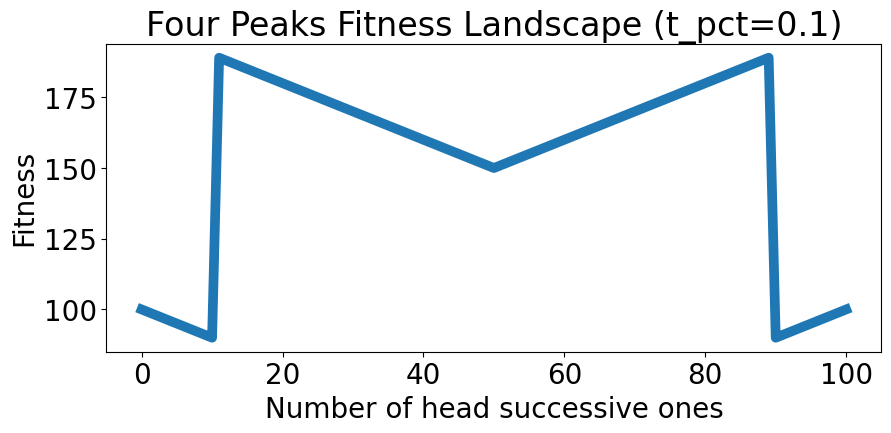

In [41]:
fitness = mlrose_hiive.FourPeaks(t_pct=0.1)
fitnesses = []
bit_string_length = 100
for i in range(bit_string_length+1):
    bit_string = np.hstack((np.ones(bit_string_length-i), np.zeros(i)))
    # print(bit_string, fitness.evaluate(bit_string))
    fitnesses.append(fitness.evaluate(bit_string))

# plot the fitness landscape
plt.figure(figsize=(10, 4))
plt.plot(fitnesses, linewidth=7)
# set font size to 16
plt.rc('font', size=20)
plt.xlabel('Number of head successive ones')
plt.ylabel('Fitness')
plt.title('Four Peaks Fitness Landscape (t_pct=0.1)')
plt.savefig('figures/four_peaks_landscape.pdf', dpi=300, bbox_inches='tight')
print(max(fitnesses))

In [4]:
# generate a np array of 15 ones followed by 15 zeros
best_1 = np.hstack((np.ones(44),np.zeros(6)))
best_2 = np.hstack((np.ones(179),np.zeros(21)))

fitness.evaluate(best_1)
fitness.evaluate(best_2)

379

In [5]:
fitness = mlrose_hiive.FourPeaks(t_pct = 0.099)
problem_easy = mlrose_hiive.DiscreteOpt(length = 30, fitness_fn = fitness, maximize=True, max_val=2)
problem_medium = mlrose_hiive.DiscreteOpt(length = 50, fitness_fn = fitness, maximize=True, max_val=2)
problem_hard = mlrose_hiive.DiscreteOpt(length = 100, fitness_fn = fitness, maximize=True, max_val=2)

# 2. Testing

In [17]:
rhc = RHCRunner(
                problem=get_four_peaks("hard"),
                experiment_name='rhc',
                output_directory=None,
                seed=FIXED_SEED,
                iteration_list= np.arange(0, 10000, 10),
                restart_list=[0],
                max_attempts=1000,
                )

rhc_results = run_experiment_multi_seed(rhc, RANDOM_SEEDS)



Experiments: 100%|██████████| 4/4 [00:01<00:00,  2.95it/s]


<Figure size 640x480 with 0 Axes>

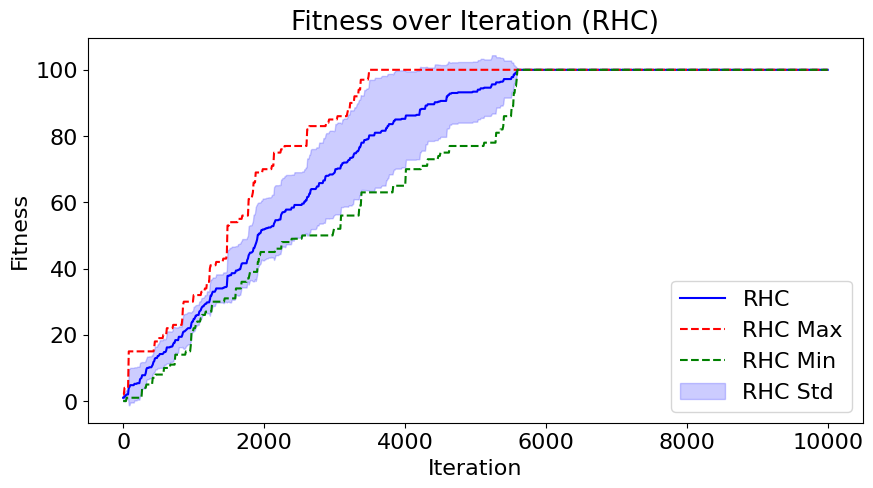

Best Fitness: 100.0


In [18]:
rhc_mean, rhc_std, rhc_min, rhc_max = runner_results_to_stats(rhc_results)
plot_fitness_iteration(rhc_mean, rhc_std, rhc_min, rhc_max, "RHC", "TSP")
print(f'Best Fitness: {rhc_mean["Fitness"].max()}')

Experiments:   0%|          | 0/1 [00:00<?, ?it/s]

Experiments: 100%|██████████| 1/1 [46:26<00:00, 2786.29s/it]


<Figure size 640x480 with 0 Axes>

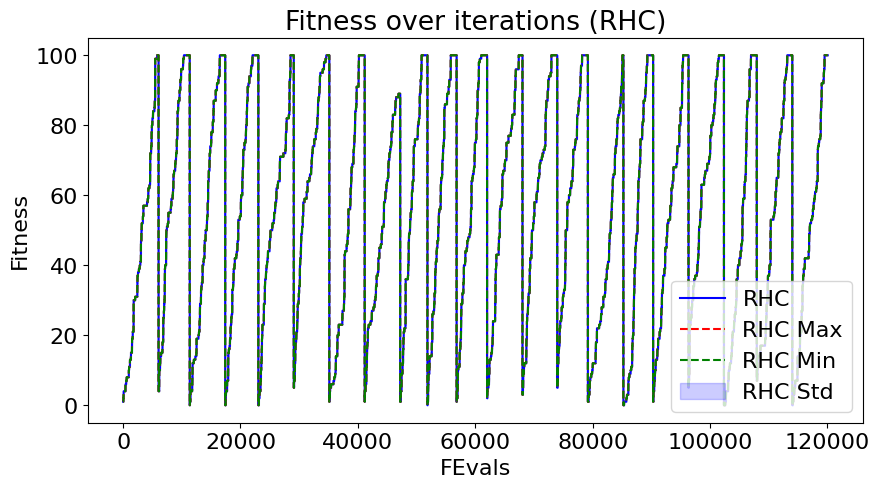

Best Fitness: 100.0


In [19]:
rhc = RHCRunner(
                problem=get_four_peaks("hard"),
                experiment_name='rhc',
                output_directory=None,
                seed=FIXED_SEED,
                iteration_list= np.arange(0, 6000, 10),
                restart_list=[20],
                max_attempts=1000,
                )

# rhc_results = run_experiment_multi_seed(rhc, RANDOM_SEEDS)
rhc_results = rhc.run()
rhc_results = [rhc_results]
rhc_mean, rhc_std, rhc_min, rhc_max = runner_results_to_stats(rhc_results)
plot_fitness_fevals(rhc_mean, rhc_std, rhc_min, rhc_max, "RHC", "TSP")
print(f'Best Fitness: {rhc_mean["Fitness"].max()}')


In [6]:
rhc_mean['Time'].max()

808.9852420880015

Experiments: 100%|██████████| 1/1 [00:02<00:00,  2.59s/it]


<Figure size 640x480 with 0 Axes>

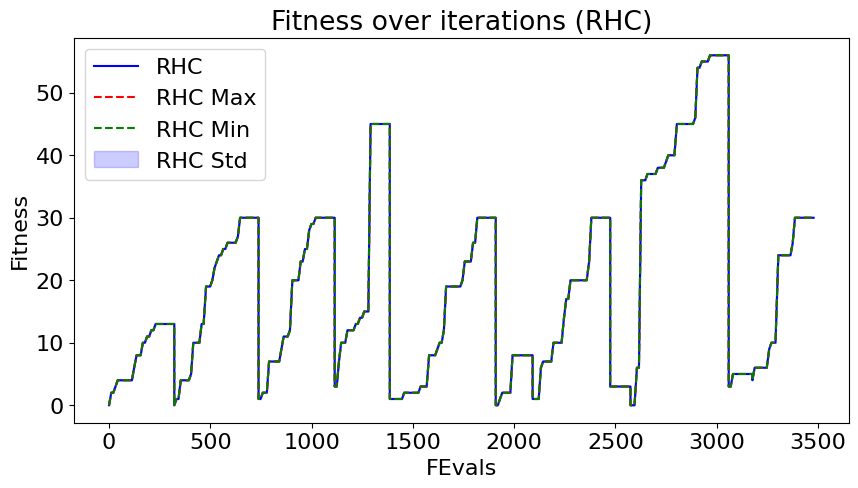

Best Fitness: 56.0
Best Time: 2.578012193996983


In [73]:
rhc = RHCRunner(
                problem=problem_easy,
                experiment_name='rhc',
                output_directory=None,
                seed=FIXED_SEED,
                iteration_list= np.arange(0, 2000, 10),
                restart_list=[10],
                max_attempts=100,
                )

# rhc_results = run_experiment_multi_seed(rhc, RANDOM_SEEDS)
rhc_results = rhc.run()
rhc_results = [rhc_results]
rhc_mean, rhc_std, rhc_min, rhc_max = runner_results_to_stats(rhc_results)
plot_fitness_fevals(rhc_mean, rhc_std, rhc_min, rhc_max, "RHC", "TSP")
print(f'Best Fitness: {rhc_mean["Fitness"].max()}')
print(f'Best Time: {rhc_mean["Time"].max()}')


Experiments:   0%|          | 0/1 [00:00<?, ?it/s]

Experiments: 100%|██████████| 1/1 [00:37<00:00, 37.42s/it]


<Figure size 640x480 with 0 Axes>

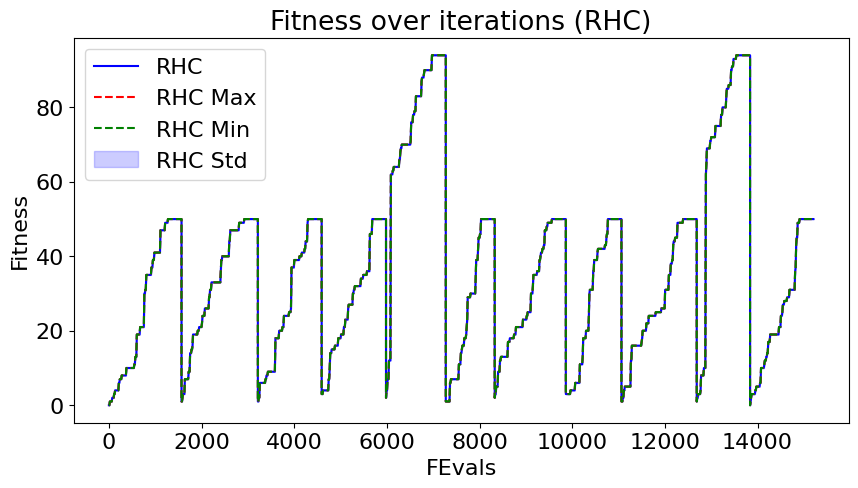

Best Fitness: 94.0
Best Time: 37.396808352001244


In [75]:
rhc = RHCRunner(
                problem=problem_medium,
                experiment_name='rhc',
                output_directory=None,
                seed=FIXED_SEED,
                iteration_list= np.arange(0, 2000, 10),
                restart_list=[10],
                max_attempts=300,
                )

# rhc_results = run_experiment_multi_seed(rhc, RANDOM_SEEDS)
rhc_results = rhc.run()
rhc_results = [rhc_results]
rhc_mean, rhc_std, rhc_min, rhc_max = runner_results_to_stats(rhc_results)
plot_fitness_fevals(rhc_mean, rhc_std, rhc_min, rhc_max, "RHC", "TSP")
print(f'Best Fitness: {rhc_mean["Fitness"].max()}')
print(f'Best Time: {rhc_mean["Time"].max()}')


<Figure size 640x480 with 0 Axes>

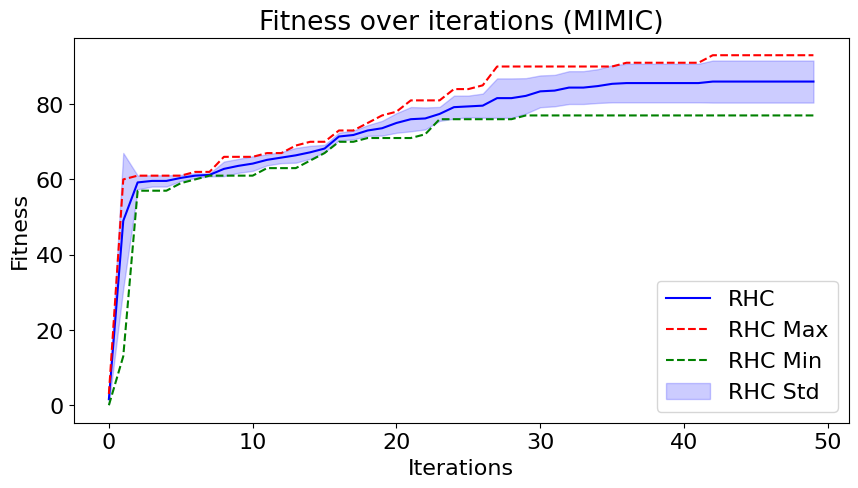

<Figure size 640x480 with 0 Axes>

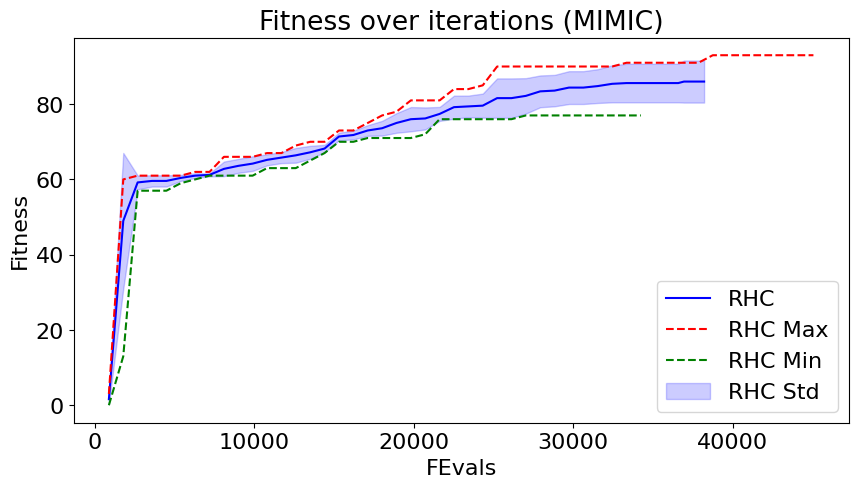

Best Fitness: 86.0
Best Fitness: 93.0


In [55]:
mmc = MIMICRunner(problem=problem_medium,
                    experiment_name='tsp_mimic',
                    output_directory=None, # note: specify an output directory to have results saved to disk
                    seed=FIXED_SEED,
                    iteration_list=np.arange(0, 100, 1),
                    max_attempts=10,
                    population_sizes=[900],
                    keep_percent_list=[0.3],
                    use_fast_mimic=True
                    )

mmc_results = run_experiment_multi_seed(mmc, RANDOM_SEEDS)
mmc_mean, mmc_std, mmc_min, mmc_max = runner_results_to_stats(mmc_results)
plot_fitness_iteration(mmc_mean, mmc_std, mmc_min, mmc_max, "MIMIC", "TSP")
plot_fitness_fevals(mmc_mean, mmc_std, mmc_min, mmc_max, "MIMIC", "TSP")
print(f'Best Fitness: {mmc_mean["Fitness"].max()}')
print(f'Best Fitness: {mmc_max["Fitness"].max()}')


<Figure size 640x480 with 0 Axes>

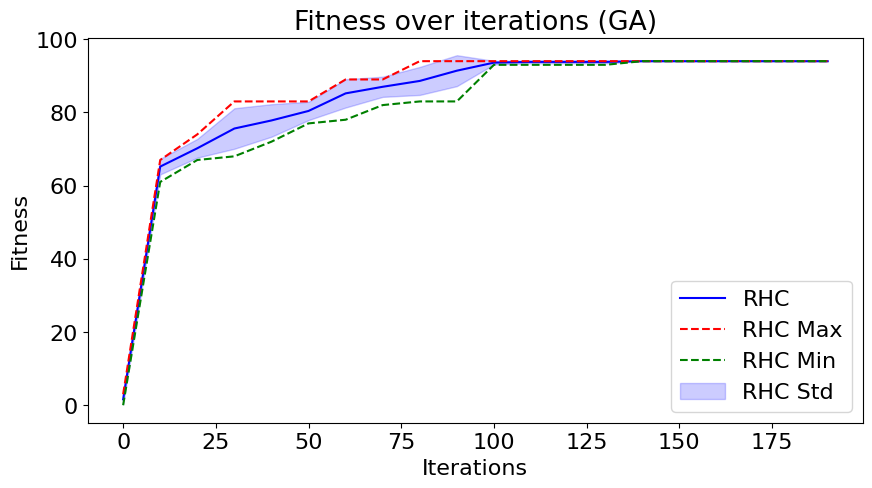

<Figure size 640x480 with 0 Axes>

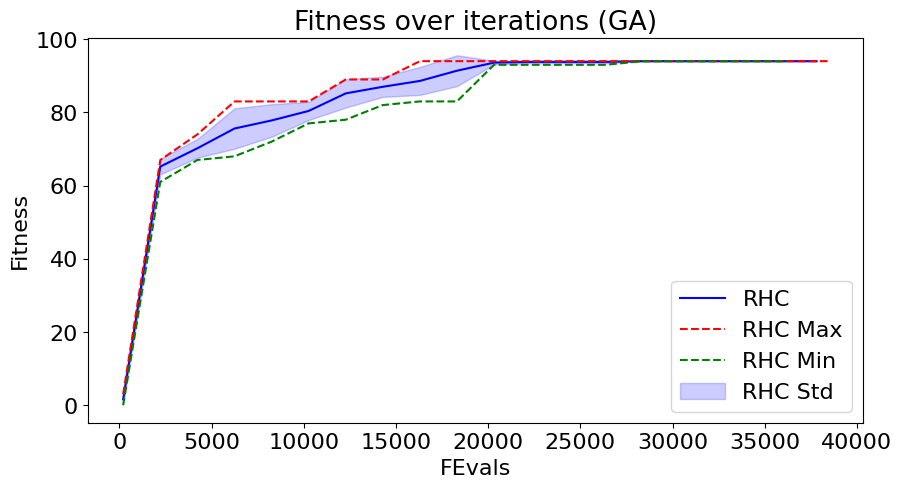

Best Fitness: 94.0


In [56]:
ga = GARunner(problem=problem_medium,
              experiment_name='tsp_ga',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=FIXED_SEED,
              iteration_list=np.arange(0, 200, 10),
              max_attempts=100,
              population_sizes=[200],
              mutation_rates=[0.05]
            )

ga_results = run_experiment_multi_seed(ga, RANDOM_SEEDS)

ga_mean, ga_std, ga_min, ga_max = runner_results_to_stats(ga_results)
plot_fitness_iteration(ga_mean, ga_std, ga_min, ga_max, "GA", "TSP")
plot_fitness_fevals(ga_mean, ga_std, ga_min, ga_max, "GA", "TSP")
print(f'Best Fitness: {ga_mean["Fitness"].max()}')


100%|██████████| 1/1 [00:05<00:00,  5.10s/it]


<Figure size 640x480 with 0 Axes>

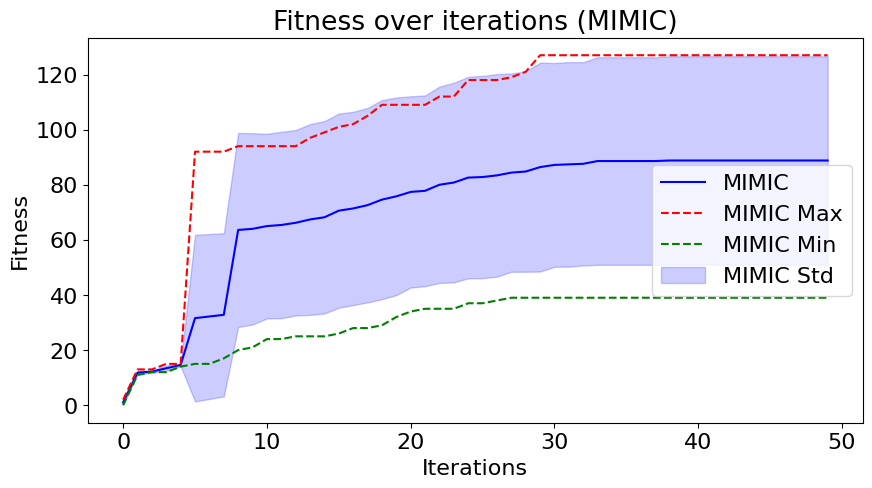

<Figure size 640x480 with 0 Axes>

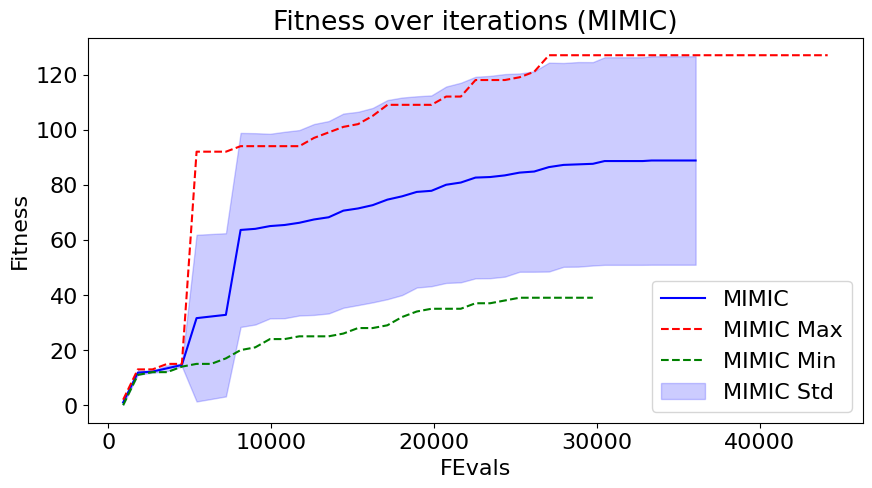

Best Fitness: 88.8
Best Fitness: 127.0


In [10]:
mmc = MIMICRunner(problem=problem_hard,
                    experiment_name='tsp_mimic',
                    output_directory=None, # note: specify an output directory to have results saved to disk
                    seed=FIXED_SEED,
                    iteration_list=np.arange(0, 50, 1),
                    max_attempts=10,
                    population_sizes=[900],
                    keep_percent_list=[0.3],
                    use_fast_mimic=True
                    )

mmc_results = run_experiment_multi_seed(mmc, RANDOM_SEEDS)
mmc_mean, mmc_std, mmc_min, mmc_max = runner_results_to_stats(mmc_results)
plot_fitness_iteration(mmc_mean, mmc_std, mmc_min, mmc_max, "MIMIC", "TSP")
plot_fitness_fevals(mmc_mean, mmc_std, mmc_min, mmc_max, "MIMIC", "TSP")
print(f'Best Fitness: {mmc_mean["Fitness"].max()}')
print(f'Best Fitness: {mmc_max["Fitness"].max()}')


<Figure size 640x480 with 0 Axes>

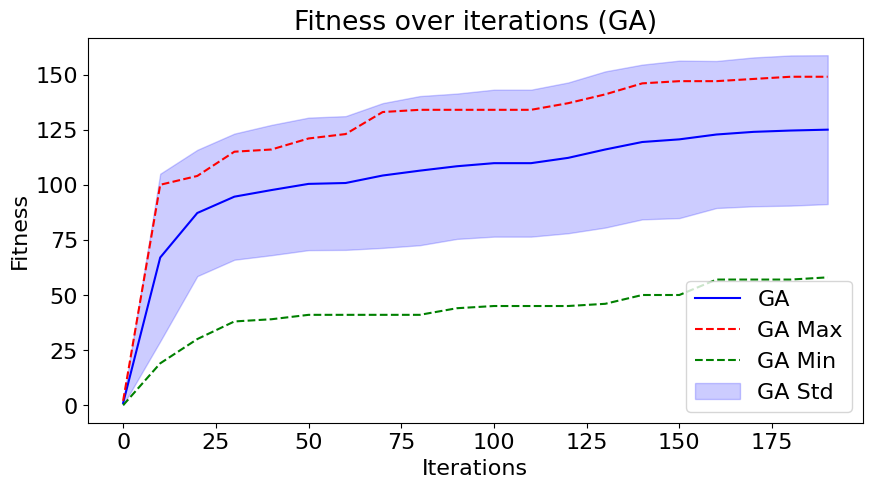

<Figure size 640x480 with 0 Axes>

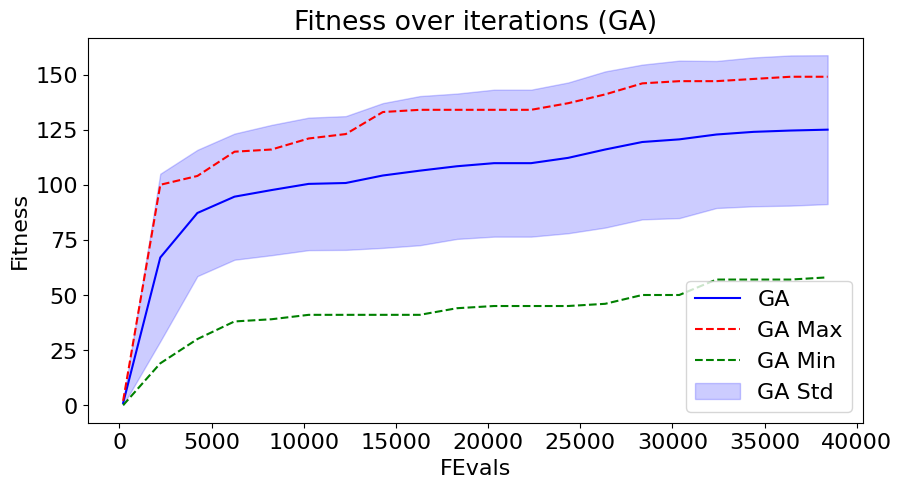

Best Fitness: 125.0
Best Fitness: 149.0


In [11]:
ga = GARunner(problem=problem_hard,
              experiment_name='tsp_ga',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=FIXED_SEED,
              iteration_list=np.arange(0, 200, 10),
              max_attempts=100,
              population_sizes=[200],
              mutation_rates=[0.05]
            )

ga_results = run_experiment_multi_seed(ga, RANDOM_SEEDS)

ga_mean, ga_std, ga_min, ga_max = runner_results_to_stats(ga_results)
plot_fitness_iteration(ga_mean, ga_std, ga_min, ga_max, "GA", "TSP")
plot_fitness_fevals(ga_mean, ga_std, ga_min, ga_max, "GA", "TSP")
print(f'Best Fitness: {ga_mean["Fitness"].max()}')
print(f'Best Fitness: {ga_max["Fitness"].max()}')


# 3. Hyperparameter Tuning

## 3.1 MIMIC

In [5]:
difficulty = "hard"
mmc = MIMICRunner(problem=get_four_peaks(difficulty),
                    experiment_name='tsp_mimic',
                    output_directory=None, # note: specify an output directory to have results saved to disk
                    seed=FIXED_SEED,
                    iteration_list=np.arange(0, 50, 5),
                    max_attempts=10,
                    population_sizes=[2500, 5000, 7500],
                    keep_percent_list=[0.03, 0.05, 0.07, 0.09],
                    use_fast_mimic=True
                    )

mmc_results = run_experiment_multi_seed(mmc, RANDOM_SEEDS)
# mmc_results = mmc.run()
# mmc_results = [mmc_results]


import pickle
with open(f'experiments/4K_MMC_HP_{difficulty}.pkl', 'wb') as f:
    pickle.dump(mmc_results, f)

Experiments: 100%|██████████| 12/12 [09:27<00:00, 47.32s/it]


Keep Percent
Population Size = 2500 Fitness: 170.0 (+/- 37.013511046643494), Time: 22.26045569120033
Population Size = 5000 Fitness: 168.2 (+/- 36.19060651605607), Time: 46.02723848460046
Population Size = 7500 Fitness: 121.4 (+/- 41.58557442190741), Time: 41.79150136599928


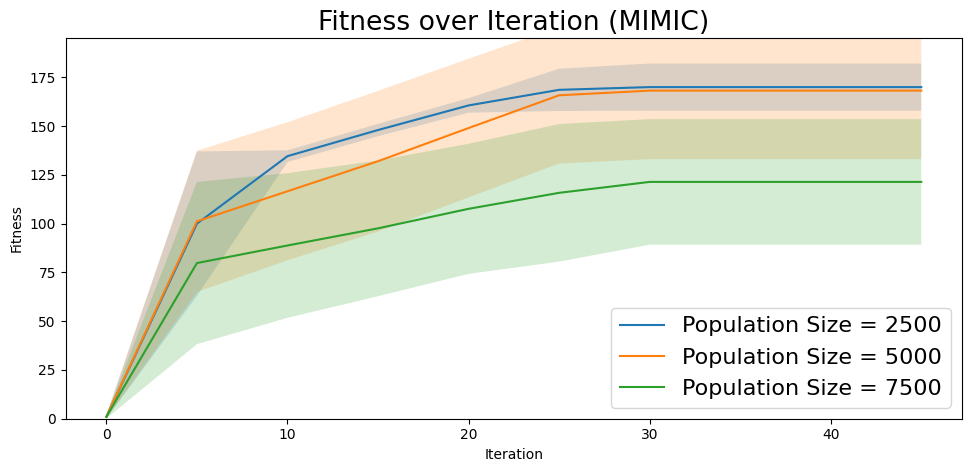

Population Size
Keep Percent = 0.03 Fitness: 133.6 (+/- 38.54036844660414), Time: 14.23116861119961
Keep Percent = 0.05 Fitness: 128.0 (+/- 48.43717580536669), Time: 19.40600608800014
Keep Percent = 0.07 Fitness: 170.0 (+/- 37.013511046643494), Time: 22.26045569120033
Keep Percent = 0.09 Fitness: 131.0 (+/- 47.36496595586236), Time: 31.404747501000383


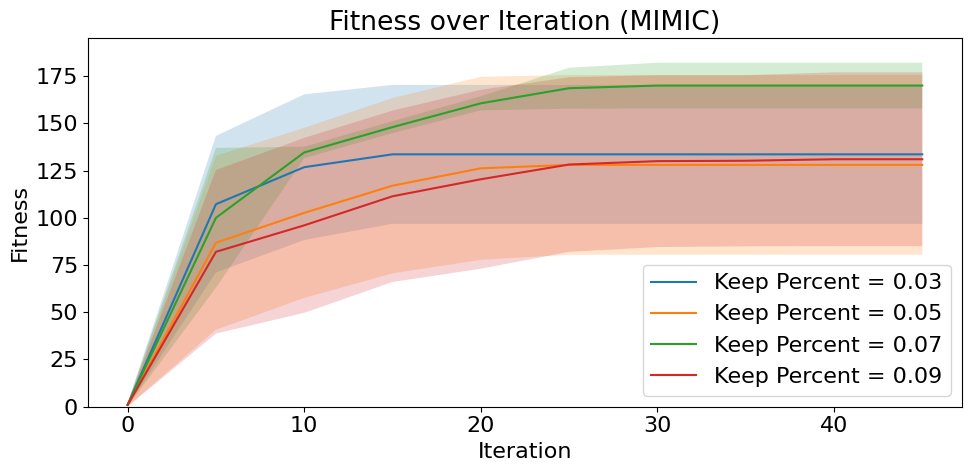

{'Population Size': 2500, 'Keep Percent': 0.07}
Mean Fitness: 170.0
MAX fitness: 184.0 
FEvals: 86052.6
Time: 22.26045569120033
    Iteration  Fitness  FEvals       Time                                              State  use_fast_mimic  Population Size  Keep Percent  max_iters
66         30    188.0  155057  16.024689  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...            True             5000          0.07         45


In [6]:
import pickle
difficulty = "hard"
with open(f'experiments/4K_MMC_HP_{difficulty}.pkl', 'rb') as f:
    mmc_results = pickle.load(f)

mmc_hp_mean, mmc_hp_std, mmc_hp_min, mmc_hp_max = runner_results_to_stats(mmc_results)
mmc_optimal_HP = get_optimal_hyperparameters(mmc_hp_mean, ['Population Size', 'Keep Percent'])
for key in mmc_optimal_HP.keys():
    plot_fitness_vs_hyperparameter(mmc_hp_mean, mmc_hp_std, mmc_optimal_HP, key, "MIMIC", "4peaks", x_axis="Iteration", y_lim=(0,195))

get_perf_stats(mmc_results, "Population Size", "Keep Percent")

In [7]:
print(f'Best Fitness: {mmc_hp_mean["Fitness"].max()}')
print(f'Best Fitness: {mmc_hp_max["Fitness"].max()}')

Best Fitness: 170.0
Best Fitness: 188.0


{'Population Size': 2500, 'Keep Percent': 0.06999999999999999}
Best Fitness Avg: 170.0
Best Fitness MAX: 184.0
Best Iteration: 123567.6
Best Time: 47.947815719798385
Best STD: 44.02090412519943
Best Fitness Iteration: 0
Best Fitness Iteration: 32


<Figure size 640x480 with 0 Axes>

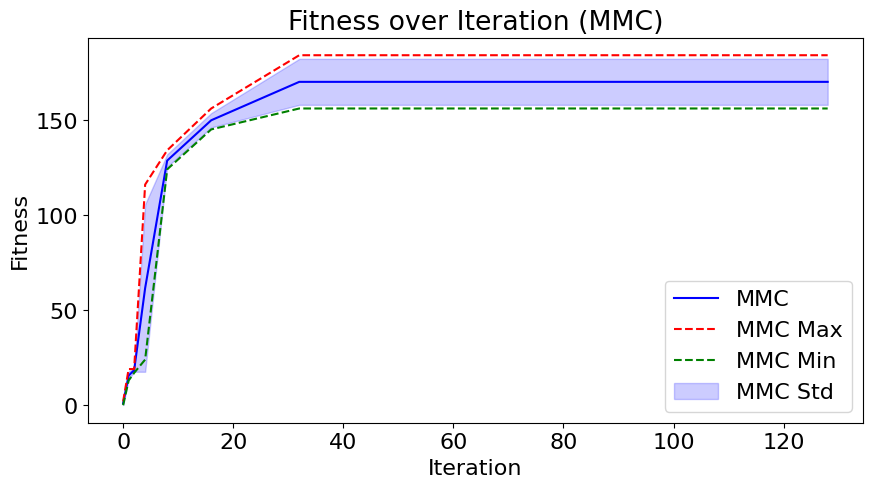

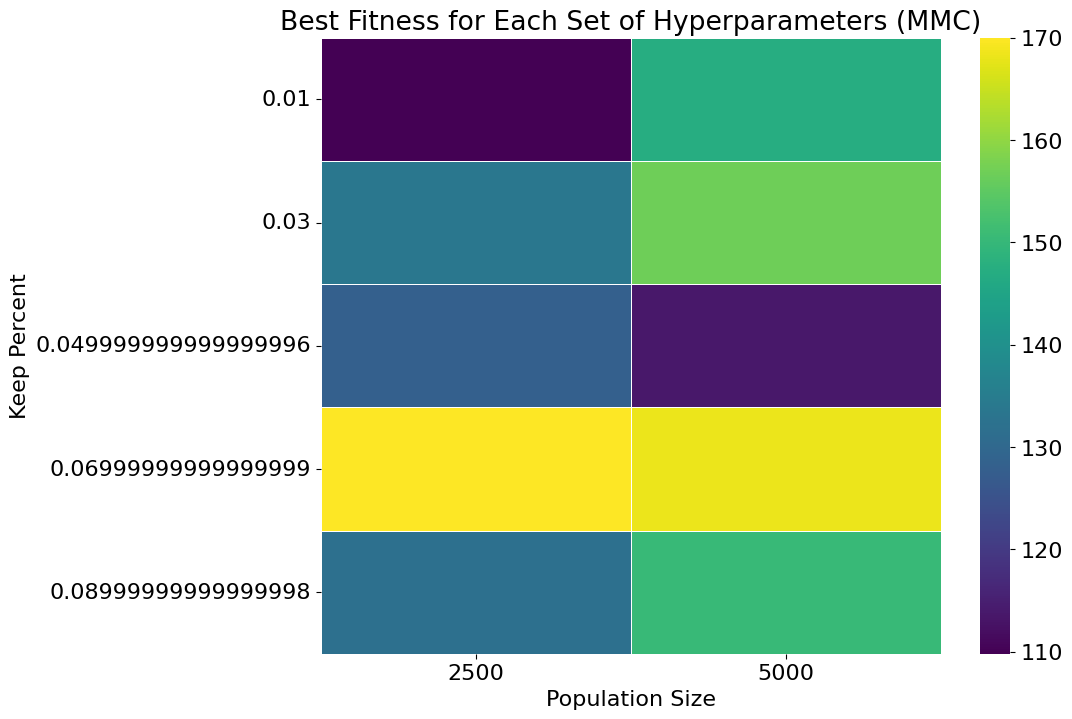

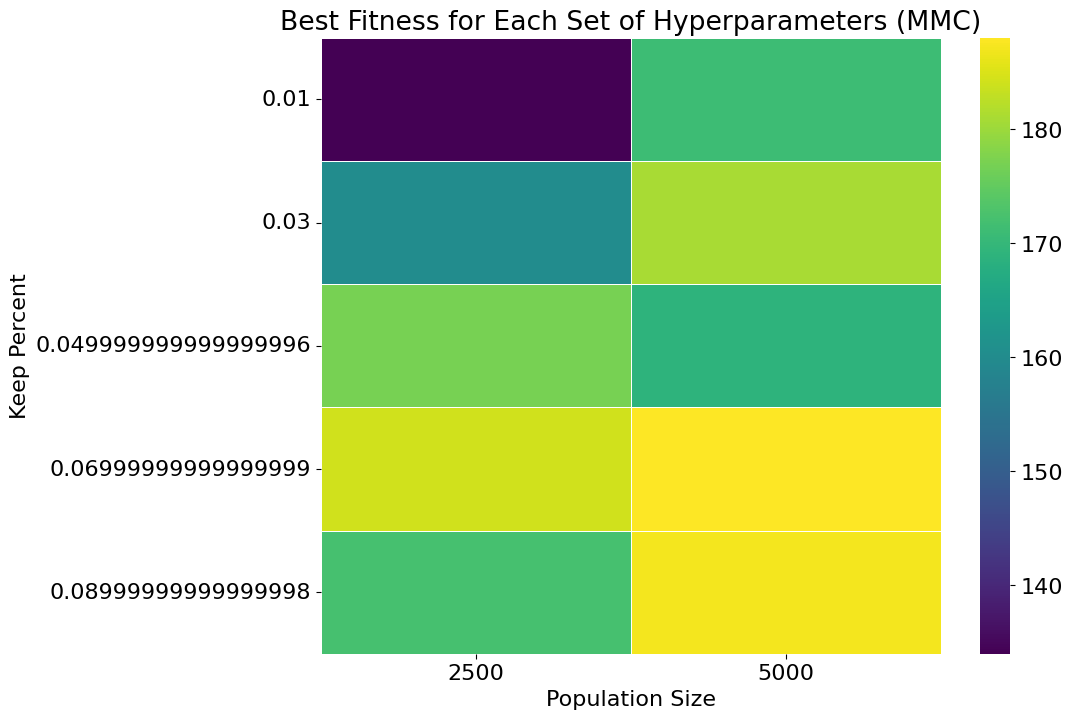

In [9]:
best_run = mmc_hp_mean[(mmc_hp_mean['Population Size'] == mmc_optimal_HP["Population Size"]) & (mmc_hp_mean['Keep Percent'] == mmc_optimal_HP["Keep Percent"])]
best_run_std = mmc_hp_std[(mmc_hp_mean['Population Size'] == mmc_optimal_HP["Population Size"]) & (mmc_hp_mean['Keep Percent'] == mmc_optimal_HP["Keep Percent"])]
best_run_min = mmc_hp_min[(mmc_hp_mean['Population Size'] == mmc_optimal_HP["Population Size"]) & (mmc_hp_mean['Keep Percent'] == mmc_optimal_HP["Keep Percent"])]
best_run_max = mmc_hp_max[(mmc_hp_mean['Population Size'] == mmc_optimal_HP["Population Size"]) & (mmc_hp_mean['Keep Percent'] == mmc_optimal_HP["Keep Percent"])]

print(mmc_optimal_HP)
print(f'Best Fitness Avg: {best_run["Fitness"].max()}')
print(f'Best Fitness MAX: {best_run_max["Fitness"].max()}')
print(f'Best Iteration: {best_run["FEvals"].max()}')
print(f'Best Time: {best_run["Time"].max()}')
print(f'Best STD: {best_run_std["Fitness"].max()}')
# find the earlieest iteration where the fitness is the best and print it
print(f'Best Fitness Iteration: {best_run_max[best_run_max["Fitness"] == best_run_max["Fitness"]]["Iteration"].min()}')
# same but with the mean
print(f'Best Fitness Iteration: {best_run[best_run["Fitness"] == best_run["Fitness"].max()]["Iteration"].min()}')
plot_fitness_iteration(best_run, best_run_std, best_run_min, best_run_max, "MMC", "4Phard")
plot_HP_heatmap(mmc_hp_mean, "Population Size", "Keep Percent", "MMC", "4Phard")
plot_HP_heatmap(mmc_hp_max, "Population Size", "Keep Percent", "MMC", "4Phard")

In [58]:
mmc = MIMICRunner(problem=problem_medium,
                    experiment_name='tsp_mimic',
                    output_directory=None, # note: specify an output directory to have results saved to disk
                    seed=FIXED_SEED,
                    iteration_list=2**np.arange(6),
                    max_attempts=15,
                    population_sizes=[1000, 1600],
                    keep_percent_list=np.arange(0.01, 0.16, 0.02),
                    use_fast_mimic=True
                    )

mmc_results = run_experiment_multi_seed(mmc, RANDOM_SEEDS)

import pickle
with open('4K_MMC_HP_medium.pkl', 'wb') as f:
    pickle.dump(mmc_results, f)

Runner 0 seed: 1
Runner 1 seed: 2
Runner 2 seed: 3
Runner 3 seed: 4
Runner 4 seed: 5


{'Population Size': 1600, 'Keep Percent': 0.10999999999999997}
Best Fitness Avg: 94.0
Best Fitness MAX: 94.0
Best Iteration: 52205.4
Best Time: 4.055372495399206
Best STD: 3.22490309931942
Best Fitness Iteration: 0
Best Fitness Iteration: 32


<Figure size 640x480 with 0 Axes>

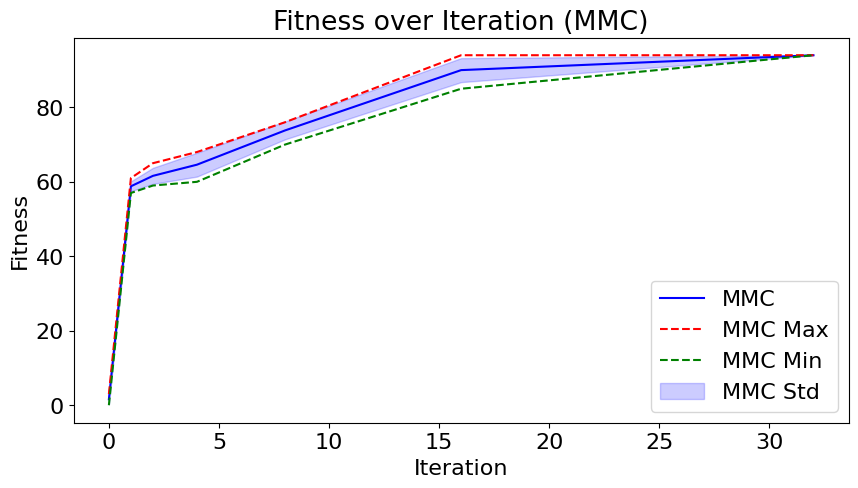

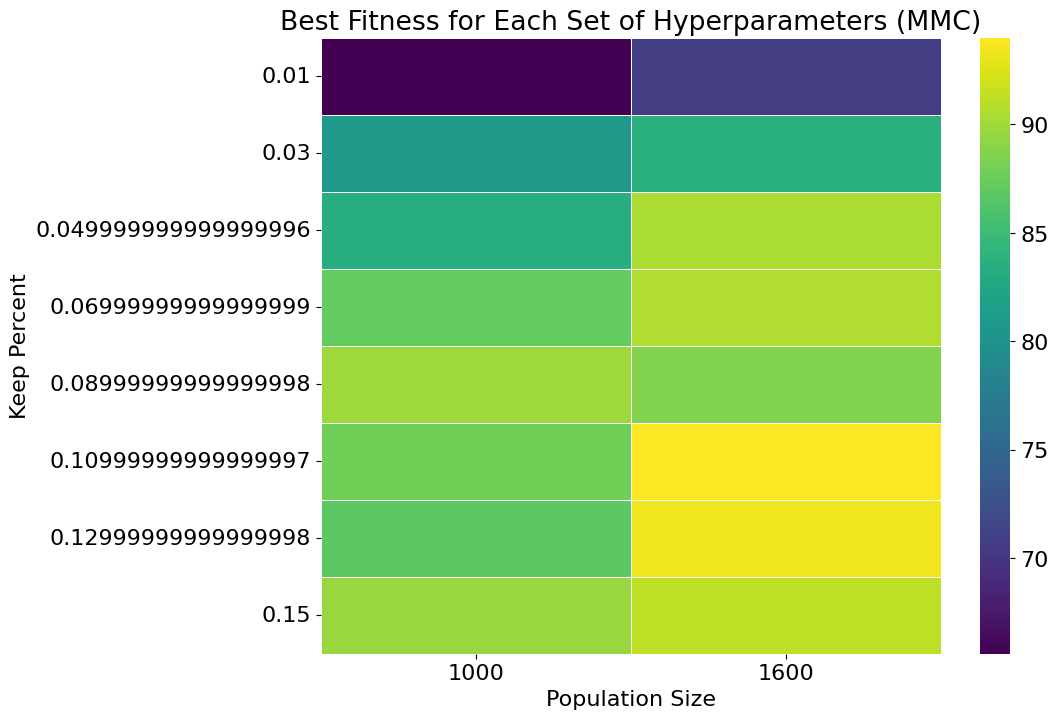

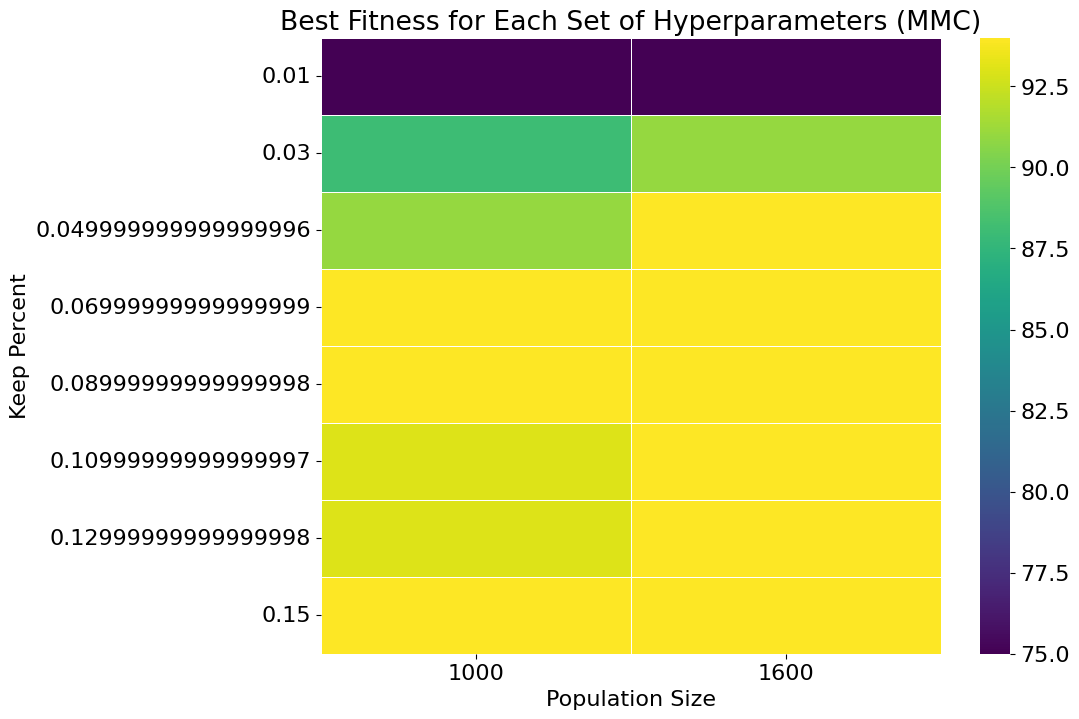

In [59]:
import pickle
with open('4K_MMC_HP_medium.pkl', 'rb') as f:
    mmc_results = pickle.load(f)

mmc_hp_mean, mmc_hp_std, mmc_hp_min, mmc_hp_max = runner_results_to_stats(mmc_results)
mmc_optimal_HP = get_optimal_hyperparameters(mmc_hp_mean, ['Population Size', 'Keep Percent'])
print(mmc_optimal_HP)
best_run = mmc_hp_mean[(mmc_hp_mean['Population Size'] == mmc_optimal_HP["Population Size"]) & (mmc_hp_mean['Keep Percent'] == mmc_optimal_HP["Keep Percent"])]
best_run_std = mmc_hp_std[(mmc_hp_mean['Population Size'] == mmc_optimal_HP["Population Size"]) & (mmc_hp_mean['Keep Percent'] == mmc_optimal_HP["Keep Percent"])]
best_run_min = mmc_hp_min[(mmc_hp_mean['Population Size'] == mmc_optimal_HP["Population Size"]) & (mmc_hp_mean['Keep Percent'] == mmc_optimal_HP["Keep Percent"])]
best_run_max = mmc_hp_max[(mmc_hp_mean['Population Size'] == mmc_optimal_HP["Population Size"]) & (mmc_hp_mean['Keep Percent'] == mmc_optimal_HP["Keep Percent"])]

print(f'Best Fitness Avg: {best_run["Fitness"].max()}')
print(f'Best Fitness MAX: {best_run_max["Fitness"].max()}')
print(f'Best Iteration: {best_run["FEvals"].max()}')
print(f'Best Time: {best_run["Time"].max()}')
print(f'Best STD: {best_run_std["Fitness"].max()}')
# find the earlieest iteration where the fitness is the best and print it
print(f'Best Fitness Iteration: {best_run_max[best_run_max["Fitness"] == best_run_max["Fitness"]]["Iteration"].min()}')
# same but with the mean
print(f'Best Fitness Iteration: {best_run[best_run["Fitness"] == best_run["Fitness"].max()]["Iteration"].min()}')
# print the number of fevals when the mean fitness is the best
plot_fitness_iteration(best_run, best_run_std, best_run_min, best_run_max, "MMC", "4Pmedium")
plot_HP_heatmap(mmc_hp_mean, "Population Size", "Keep Percent", "MMC", "4Phard")
plot_HP_heatmap(mmc_hp_max, "Population Size", "Keep Percent", "MMC", "4Phard")

In [52]:
mmc = MIMICRunner(problem=problem_easy,
                    experiment_name='tsp_mimic',
                    output_directory=None, # note: specify an output directory to have results saved to disk
                    seed=FIXED_SEED,
                    iteration_list=2**np.arange(6),
                    max_attempts=15,
                    population_sizes=[100, 700],
                    keep_percent_list=np.arange(0.01, 0.16, 0.02),
                    use_fast_mimic=True
                    )

mmc_results = run_experiment_multi_seed(mmc, RANDOM_SEEDS)

import pickle
with open('4K_MMC_HP_easy.pkl', 'wb') as f:
    pickle.dump(mmc_results, f)

Runner 0 seed: 1
Runner 1 seed: 2
Runner 2 seed: 3
Runner 3 seed: 4
Runner 4 seed: 5


{'Population Size': 700, 'Keep Percent': 0.12999999999999998}
Best Fitness Avg: 56.0
Best Fitness MAX: 56.0
Best Iteration: 17811.2
Best Time: 0.6004250190002495
Best STD: 2.280350850198276
Best Fitness Iteration: 0
Best Fitness Iteration: 16


<Figure size 640x480 with 0 Axes>

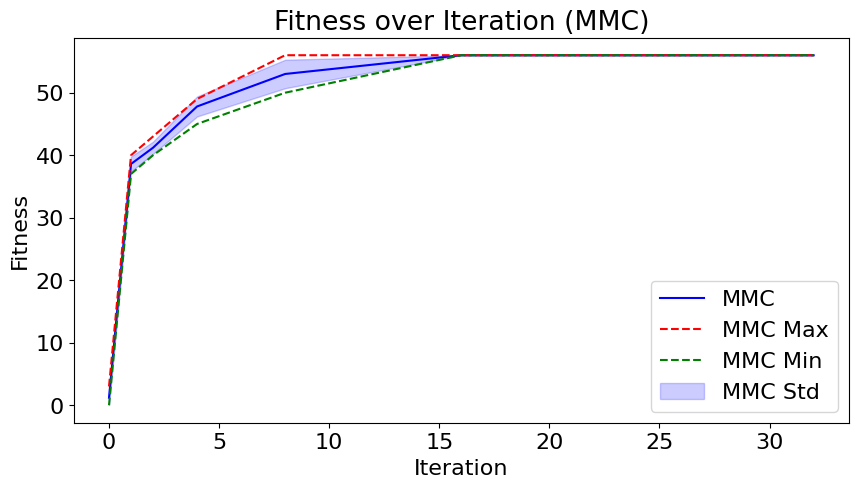

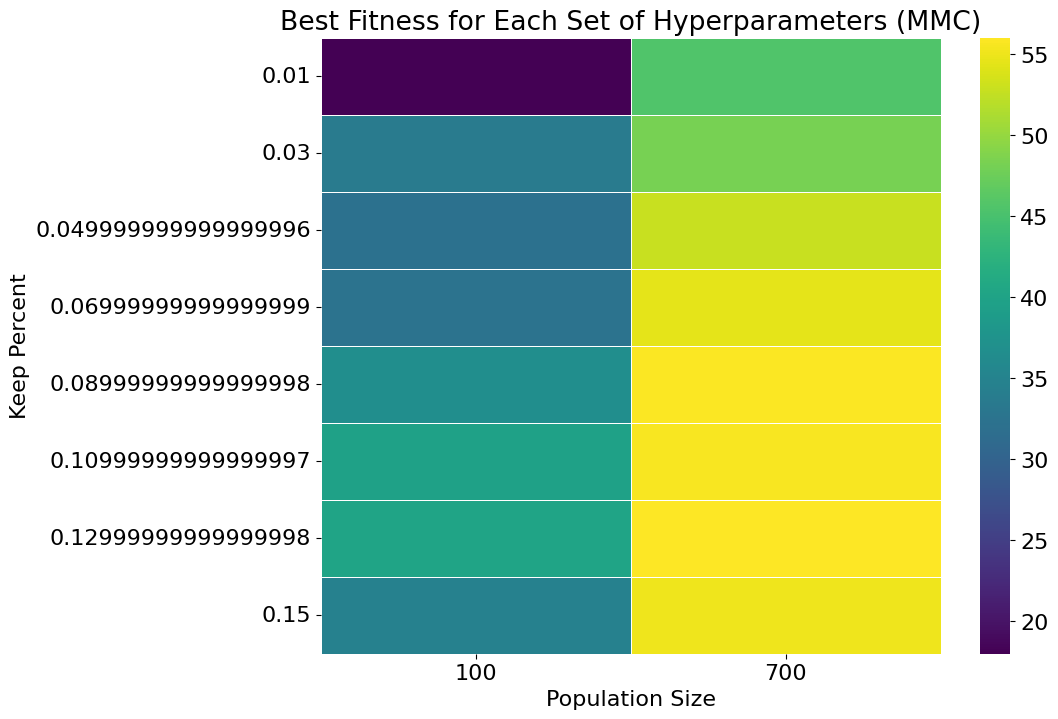

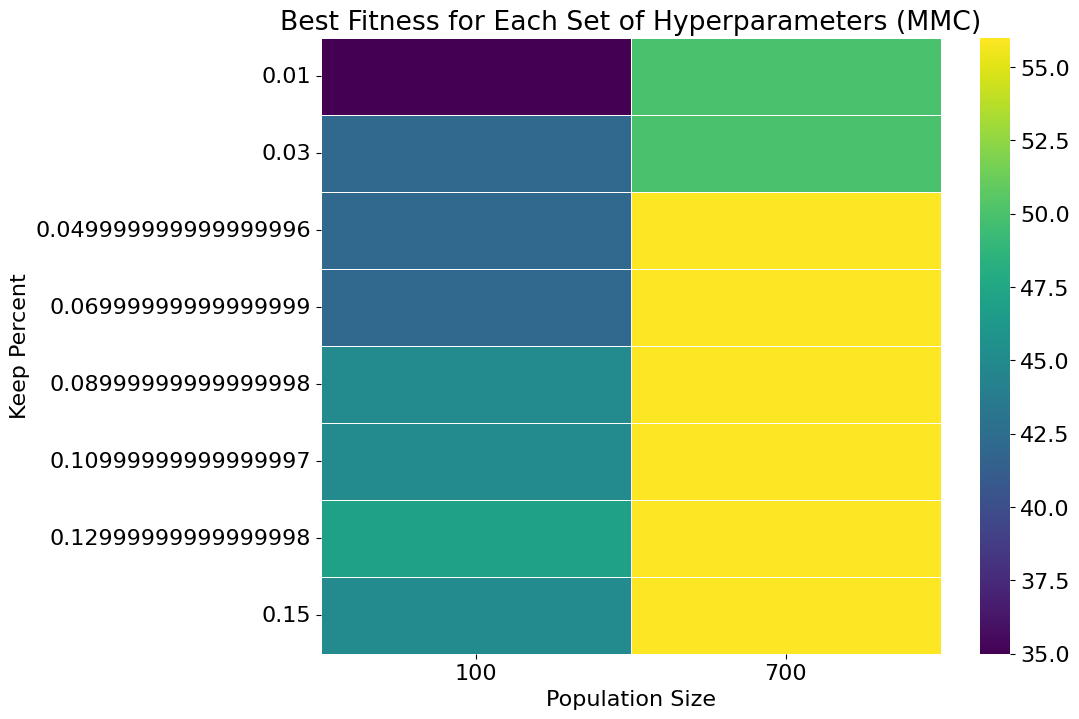

In [53]:
import pickle
with open('4K_MMC_HP_easy.pkl', 'rb') as f:
    mmc_results = pickle.load(f)

mmc_hp_mean, mmc_hp_std, mmc_hp_min, mmc_hp_max = runner_results_to_stats(mmc_results)
mmc_optimal_HP = get_optimal_hyperparameters(mmc_hp_mean, ['Population Size', 'Keep Percent'])
print(mmc_optimal_HP)
best_run = mmc_hp_mean[(mmc_hp_mean['Population Size'] == mmc_optimal_HP["Population Size"]) & (mmc_hp_mean['Keep Percent'] == mmc_optimal_HP["Keep Percent"])]
best_run_std = mmc_hp_std[(mmc_hp_mean['Population Size'] == mmc_optimal_HP["Population Size"]) & (mmc_hp_mean['Keep Percent'] == mmc_optimal_HP["Keep Percent"])]
best_run_min = mmc_hp_min[(mmc_hp_mean['Population Size'] == mmc_optimal_HP["Population Size"]) & (mmc_hp_mean['Keep Percent'] == mmc_optimal_HP["Keep Percent"])]
best_run_max = mmc_hp_max[(mmc_hp_mean['Population Size'] == mmc_optimal_HP["Population Size"]) & (mmc_hp_mean['Keep Percent'] == mmc_optimal_HP["Keep Percent"])]

print(f'Best Fitness Avg: {best_run["Fitness"].max()}')
print(f'Best Fitness MAX: {best_run_max["Fitness"].max()}')
print(f'Best Iteration: {best_run["FEvals"].max()}')
print(f'Best Time: {best_run["Time"].max()}')
print(f'Best STD: {best_run_std["Fitness"].max()}')
# find the earlieest iteration where the fitness is the best and print it
print(f'Best Fitness Iteration: {best_run_max[best_run_max["Fitness"] == best_run_max["Fitness"]]["Iteration"].min()}')
# same but with the mean
print(f'Best Fitness Iteration: {best_run[best_run["Fitness"] == best_run["Fitness"].max()]["Iteration"].min()}')
# print the number of fevals when the mean fitness is the best
plot_fitness_iteration(best_run, best_run_std, best_run_min, best_run_max, "MMC", "4Pmedium")
plot_HP_heatmap(mmc_hp_mean, "Population Size", "Keep Percent", "MMC", "4Phard")
plot_HP_heatmap(mmc_hp_max, "Population Size", "Keep Percent", "MMC", "4Phard")

## 3.2 GA

In [22]:
difficulty = "hard"

ga = GARunner(problem=get_four_peaks(difficulty),
                experiment_name='tsp_ga',
                output_directory=None, # note: specify an output directory to have results saved to disk
                seed=FIXED_SEED,
                iteration_list=np.arange(0, 1000, 10),
                max_attempts=30,
                population_sizes=[100, 250, 500, 750],
                mutation_rates=np.arange(0.01, 0.21, 0.05)
                )

ga_results = run_experiment_multi_seed(ga, RANDOM_SEEDS)

import pickle
with open(f'experiments/4K_GA_HP_{difficulty}.pkl', 'wb') as f:
    pickle.dump(ga_results, f)

In [23]:
import pickle
difficulty = "hard"
with open(f'experiments/4K_GA_HP_{difficulty}.pkl', 'rb') as f:
    ga_results = pickle.load(f)

ga_hp_mean, ga_hp_std, ga_hp_min, ga_hp_max = runner_results_to_stats(ga_results)
ga_hp_mean
ga_optimal_HP = get_optimal_hyperparameters(ga_hp_mean, ['Population Size', 'Mutation Rate'])
ga_optimal_HP

{'Population Size': 250, 'Mutation Rate': 0.16000000000000003}

Mutation Rate
HP: Population Size, <class 'str'>
Population Size = 100 Fitness: 104.0 (+/- 49.15689168366934), Time: 1.4107925603999774
HP: Population Size, <class 'str'>
Population Size = 250 Fitness: 189.0 (+/- 45.83273939009101), Time: 7.757854116999942
HP: Population Size, <class 'str'>
Population Size = 500 Fitness: 189.0 (+/- 39.46846842734083), Time: 11.12849312860003
HP: Population Size, <class 'str'>
Population Size = 750 Fitness: 189.0 (+/- 4.560701700396552), Time: 11.466452505200005


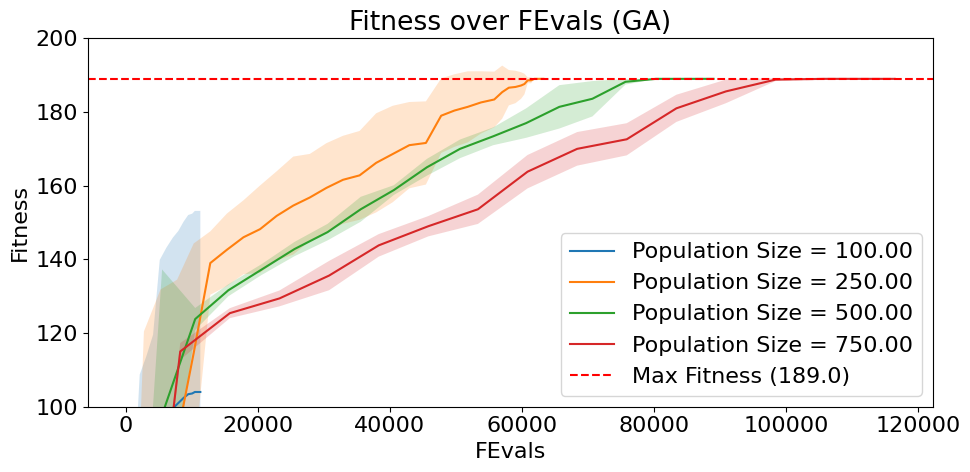

Population Size
HP: Mutation Rate, <class 'str'>
Mutation Rate = 0.01 Fitness: 139.0 (+/- 46.641612322045646), Time: 2.52650063720007
HP: Mutation Rate, <class 'str'>
Mutation Rate = 0.060000000000000005 Fitness: 137.6 (+/- 39.127483946709376), Time: 2.4522817251999185
HP: Mutation Rate, <class 'str'>
Mutation Rate = 0.11 Fitness: 175.6 (+/- 38.76390073251142), Time: 6.585967926600006
HP: Mutation Rate, <class 'str'>
Mutation Rate = 0.16000000000000003 Fitness: 189.0 (+/- 45.83273939009101), Time: 7.757854116999942


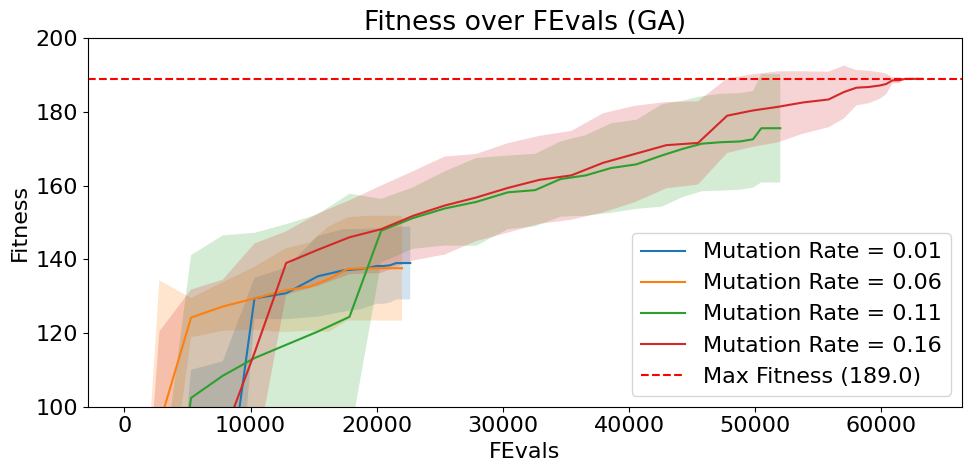

In [25]:
for key in ga_optimal_HP.keys():
    plot_fitness_vs_hyperparameter(ga_hp_mean, ga_hp_std, ga_optimal_HP, key, "GA", "4PEAKS", y_lim=(100, 200), x_axis="FEvals")

In [26]:
get_perf_stats(ga_results, "Population Size", "Mutation Rate")

{'Population Size': 250, 'Mutation Rate': 0.16000000000000003}
Mean Fitness: 189.0
MAX fitness: 189.0 
FEvals: 63244.2
Time: 7.757854116999942
     Iteration  Fitness  FEvals      Time                                              State  Population Size  Mutation Rate  max_iters
716        160    189.0   40450  6.107346  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, ...              250           0.16        990


{'Population Size': 250, 'Mutation Rate': 0.16000000000000003}
Best Fitness Avg: 189.0
Best Fitness MAX: 189.0
Best Iteration: 63244.2
Best Time: 7.757854116999942
Best STD: 45.83273939009101
Best Fitness Iteration: 0
Best Fitness Iteration: 310


<Figure size 640x480 with 0 Axes>

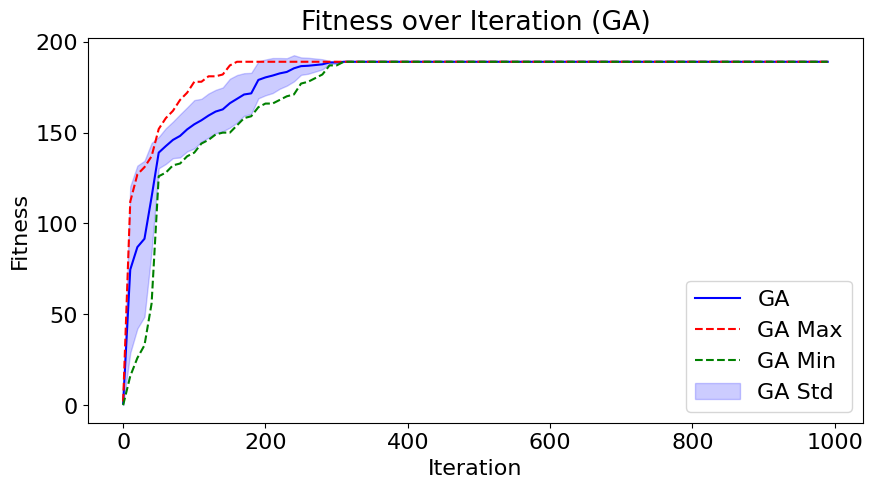

Population Size    100    250    500    750
Mutation Rate                              
0.01              81.2  139.0  143.2  188.8
0.06             108.2  137.6  189.0  189.0
0.11             105.0  175.6  189.0  189.0
0.16             104.0  189.0  189.0  189.0


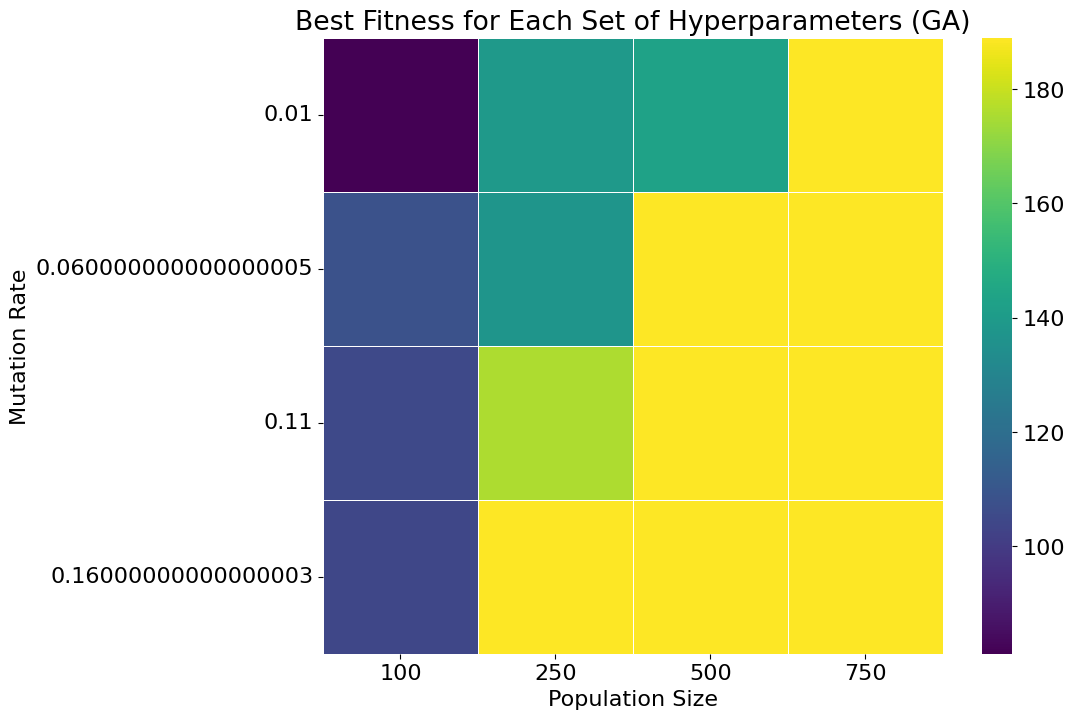

In [31]:
best_run = ga_hp_mean[(ga_hp_mean['Population Size'] == ga_optimal_HP["Population Size"]) & (ga_hp_mean['Mutation Rate'] == ga_optimal_HP["Mutation Rate"])]
best_run_std = ga_hp_std[(ga_hp_mean['Population Size'] == ga_optimal_HP["Population Size"]) & (ga_hp_mean['Mutation Rate'] == ga_optimal_HP["Mutation Rate"])]
best_run_min = ga_hp_min[(ga_hp_mean['Population Size'] == ga_optimal_HP["Population Size"]) & (ga_hp_mean['Mutation Rate'] == ga_optimal_HP["Mutation Rate"])]
best_run_max = ga_hp_max[(ga_hp_mean['Population Size'] == ga_optimal_HP["Population Size"]) & (ga_hp_mean['Mutation Rate'] == ga_optimal_HP["Mutation Rate"])]
print(ga_optimal_HP)
print(f'Best Fitness Avg: {best_run["Fitness"].max()}')
print(f'Best Fitness MAX: {best_run_max["Fitness"].max()}')
print(f'Best Iteration: {best_run["FEvals"].max()}')
print(f'Best Time: {best_run["Time"].max()}')
print(f'Best STD: {best_run_std["Fitness"].max()}')
# find the earlieest iteration where the fitness is the best and print it
print(f'Best Fitness Iteration: {best_run_max[best_run_max["Fitness"] == best_run_max["Fitness"]]["Iteration"].min()}')
# same but with the mean
print(f'Best Fitness Iteration: {best_run[best_run["Fitness"] == best_run["Fitness"].max()]["Iteration"].min()}')
# print the number of fevals when the mean fitness is the best
plot_fitness_iteration(best_run, best_run_std, best_run_min, best_run_max, "GA", "4Pmedium")
plot_HP_heatmap(ga_hp_mean, "Population Size", "Mutation Rate", "GA", "4Pmedium")


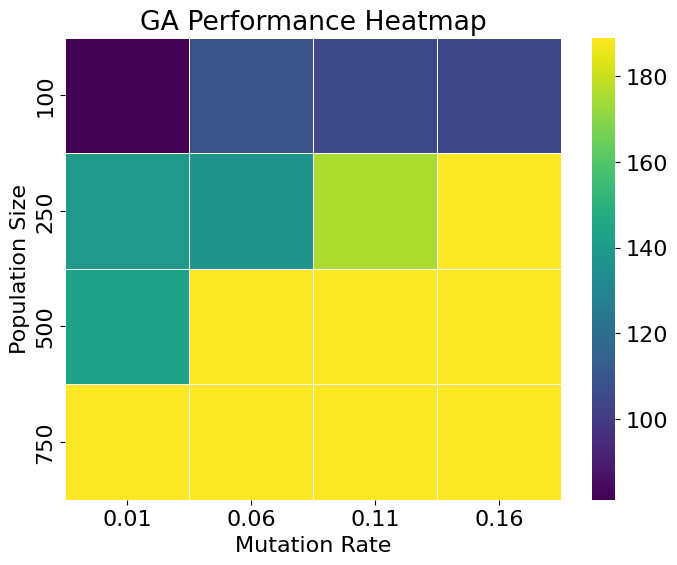

In [38]:
import seaborn as sns
data = {
    'Population Size': [100, 250, 500, 750],
    '0.01': [81.2, 139.0, 143.2, 188.8],
    '0.06': [108.2, 137.6, 189.0, 189.0],
    '0.11': [105.0, 175.6, 189.0, 189.0],
    '0.16': [104.0, 189.0, 189.0, 189.0]
}

df = pd.DataFrame(data)

# Create a heatmap
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(df.set_index('Population Size'), annot=False, cmap='viridis', fmt=".1f", linewidths=.5)
plt.xlabel('Mutation Rate')
plt.title('GA Performance Heatmap')
plt.savefig("figures/GA_HP_heatmap.pdf", dpi=300, bbox_inches="tight")
plt.show()

In [56]:
difficulty = "medium"

ga = GARunner(problem=get_four_peaks(difficulty),
                experiment_name='tsp_ga',
                output_directory=None, # note: specify an output directory to have results saved to disk
                seed=FIXED_SEED,
                iteration_list=np.arange(0, 1000, 10),
                max_attempts=30,
                population_sizes=[180],
                mutation_rates=np.arange(0.01, 0.21, 0.05)
                )

ga_results = run_experiment_multi_seed(ga, RANDOM_SEEDS)

import pickle
with open(f'experiments/4K_GA_HP_{difficulty}.pkl', 'wb') as f:
    pickle.dump(ga_results, f)

In [57]:
import pickle
difficulty = "medium"
with open(f'experiments/4K_GA_HP_{difficulty}.pkl', 'rb') as f:
    ga_results = pickle.load(f)

ga_hp_mean, ga_hp_std, ga_hp_min, ga_hp_max = runner_results_to_stats(ga_results)
ga_optimal_HP = get_optimal_hyperparameters(ga_hp_mean, ['Population Size', 'Mutation Rate'])
ga_optimal_HP

{'Population Size': 180, 'Mutation Rate': 0.16000000000000003}

In [58]:
get_perf_stats(ga_results, "Population Size", "Mutation Rate")

{'Population Size': 180, 'Mutation Rate': 0.16000000000000003}
Mean Fitness: 94.0
MAX fitness: 94.0 
FEvals: 18952.2
Time: 1.5580827567999223
     Iteration  Fitness  FEvals      Time                                              State  Population Size  Mutation Rate  max_iters
105         50     94.0    9250  0.676544  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...              180           0.06        990


In [63]:
difficulty = "easy"

ga = GARunner(problem=get_four_peaks(difficulty),
                experiment_name='tsp_ga',
                output_directory=None, # note: specify an output directory to have results saved to disk
                seed=FIXED_SEED,
                iteration_list=np.arange(0, 1000, 10),
                max_attempts=40,
                population_sizes=[50],
                mutation_rates=np.arange(0.01, 0.21, 0.05)
                )

ga_results = run_experiment_multi_seed(ga, RANDOM_SEEDS)

import pickle
with open(f'experiments/4K_GA_HP_{difficulty}.pkl', 'wb') as f:
    pickle.dump(ga_results, f)

get_perf_stats(ga_results, "Population Size", "Mutation Rate")

{'Population Size': 50, 'Mutation Rate': 0.11}
Mean Fitness: 56.0
MAX fitness: 56.0 
FEvals: 6559.2
Time: 0.36739216940004554
     Iteration  Fitness  FEvals      Time                                              State  Population Size  Mutation Rate  max_iters
203         30     56.0    1589  0.102198  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, ...               50           0.11        990


##  3.3 SA

In [11]:
difficulty = "hard"
sa = SARunner(problem=get_four_peaks(difficulty),
              experiment_name='sa',
              output_directory=None, # note: specify an output directory to have results saved to disk "experiments/TSP_SA_HP"
              seed=FIXED_SEED,
              iteration_list=np.arange(0, 10000, 100),
              max_attempts=300,
              temperature_list=[1,2,5,10,20],
              decay_list=[mlrose_hiive.GeomDecay, mlrose_hiive.ExpDecay, mlrose_hiive.ArithDecay])

sa_results = run_experiment_multi_seed(sa, RANDOM_SEEDS)

import pickle
with open(f'experiments/4PEAKS_SA_HP_{difficulty}.pkl', 'wb') as f:
    pickle.dump(sa_results, f)


Experiments: 100%|██████████| 15/15 [04:22<00:00, 17.48s/it]


{'schedule_init_temp': 1, 'schedule_type': 'geometric'}
Mean Fitness: 117.8
MAX fitness: 189.0 
FEvals: 7045.0
Time: 4.076666014800139
      Iteration  Fitness  FEvals       Time                                              State schedule_type  schedule_init_temp  schedule_decay  schedule_min_temp  schedule_current_value Temperature  max_iters  schedule_exp_const
1340       4000    189.0    6923  13.543893  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   exponential                  20             NaN              0.001               19.286421          20       9900               0.005
schedule_type
schedule_init_temp = 1 Fitness: 117.8 (+/- 40.350464681339176), Time: 4.076666014800139
schedule_init_temp = 2 Fitness: 117.8 (+/- 37.876641878603756), Time: 8.439422912199916
schedule_init_temp = 5 Fitness: 100.0 (+/- 18.994736112934024), Time: 10.65713821419995
schedule_init_temp = 10 Fitness: 99.8 (+/- 16.589153082662175), Time: 12.843980824999926
schedule_init_temp = 20 Fitness: 99.

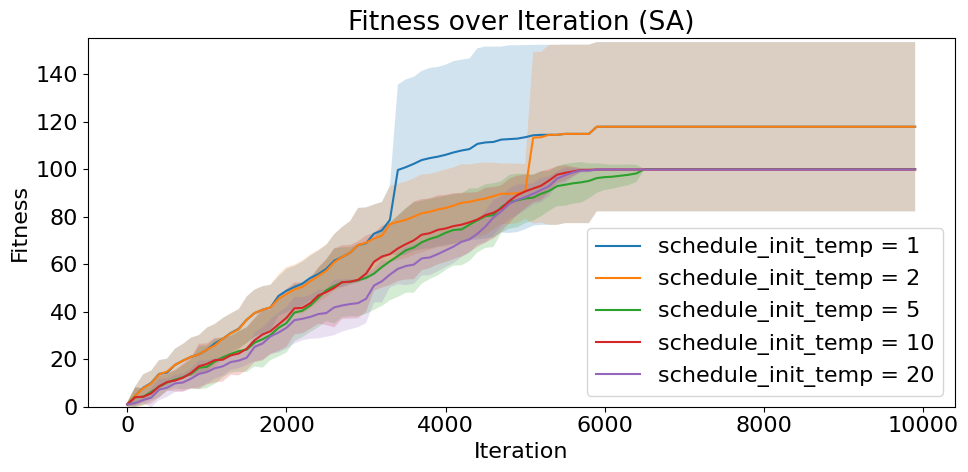

schedule_init_temp
schedule_type = geometric Fitness: 117.8 (+/- 40.350464681339176), Time: 4.076666014800139
schedule_type = exponential Fitness: 117.8 (+/- 40.350464681339176), Time: 5.926475864000167
schedule_type = arithmetic Fitness: 100.0 (+/- 22.135943621178654), Time: 13.200181484000131


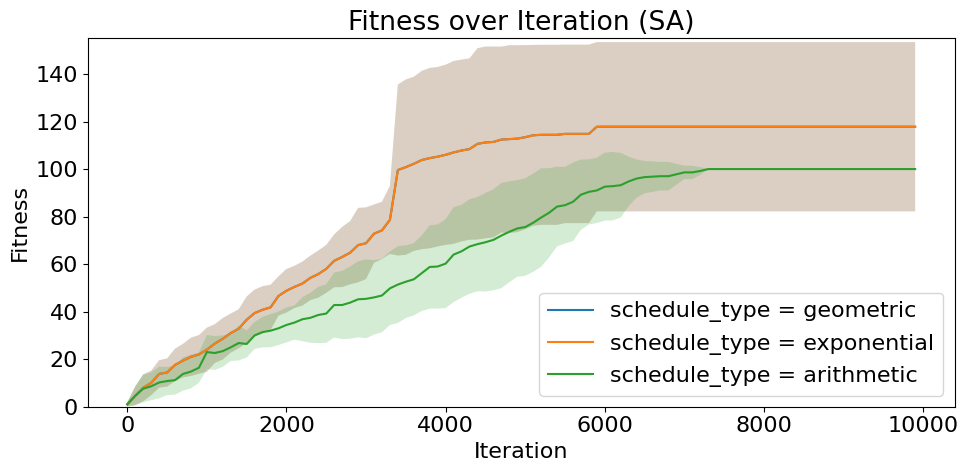

In [21]:
import pickle
difficulty = "hard"
with open(f'experiments/4PEAKS_SA_HP_{difficulty}.pkl', 'rb') as f:
    sa_results = pickle.load(f)

get_perf_stats(sa_results, "schedule_init_temp", "schedule_type")

sa_hp_mean, sa_hp_std, sa_hp_min, sa_hp_max = runner_results_to_stats(sa_results)
sa_optimal_HP = get_optimal_hyperparameters(sa_hp_mean, ['schedule_init_temp', 'schedule_type'])

for key in sa_optimal_HP.keys():
    plot_fitness_vs_hyperparameter(sa_hp_mean, sa_hp_std, sa_optimal_HP, key, "SA", "4PEAKS", y_lim=(0, 155))


Best Fitness Avg: 117.8
Best Fitness MAX: 189.0
Best Iteration: 7045.0
Best Time: 4.076666014800139


<Figure size 640x480 with 0 Axes>

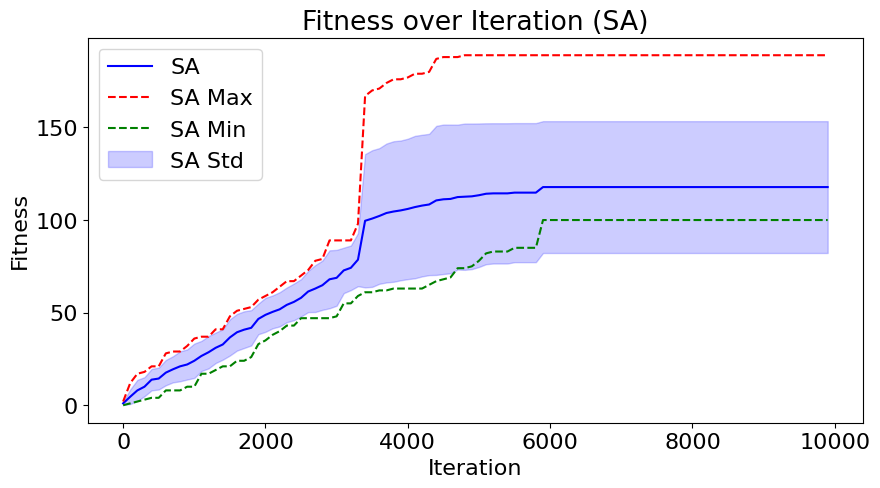

In [22]:
best_run = sa_hp_mean[(sa_hp_mean['schedule_init_temp'] == sa_optimal_HP['schedule_init_temp']) & (sa_hp_mean['schedule_type'] == sa_optimal_HP['schedule_type'])]
best_max = sa_hp_max[(sa_hp_mean['schedule_init_temp'] == sa_optimal_HP['schedule_init_temp']) & (sa_hp_mean['schedule_type'] == sa_optimal_HP['schedule_type'])]
best_min = sa_hp_min[(sa_hp_mean['schedule_init_temp'] == sa_optimal_HP['schedule_init_temp']) & (sa_hp_mean['schedule_type'] == sa_optimal_HP['schedule_type'])]
best_std = sa_hp_std[(sa_hp_mean['schedule_init_temp'] == sa_optimal_HP['schedule_init_temp']) & (sa_hp_mean['schedule_type'] == sa_optimal_HP['schedule_type'])]
print(f'Best Fitness Avg: {best_run["Fitness"].max()}')
print(f'Best Fitness MAX: {best_max["Fitness"].max()}')
print(f'Best Iteration: {best_run["FEvals"].max()}')
print(f'Best Time: {best_run["Time"].max()}')

plot_fitness_iteration(best_run, best_std, best_min, best_max, "SA", "TSP")

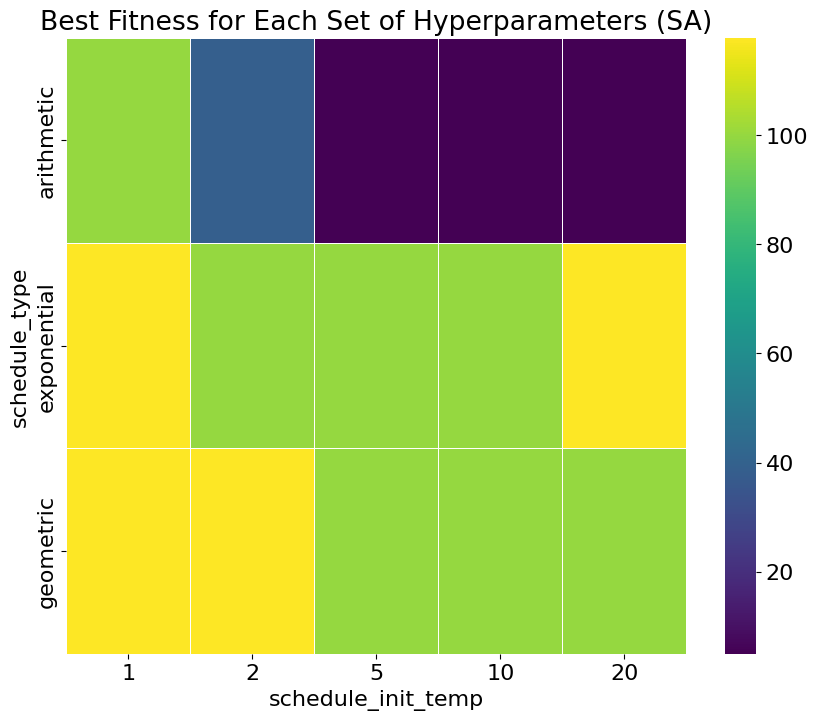

In [23]:
plot_HP_heatmap(sa_hp_mean, "schedule_init_temp", "schedule_type", "SA", "4P")

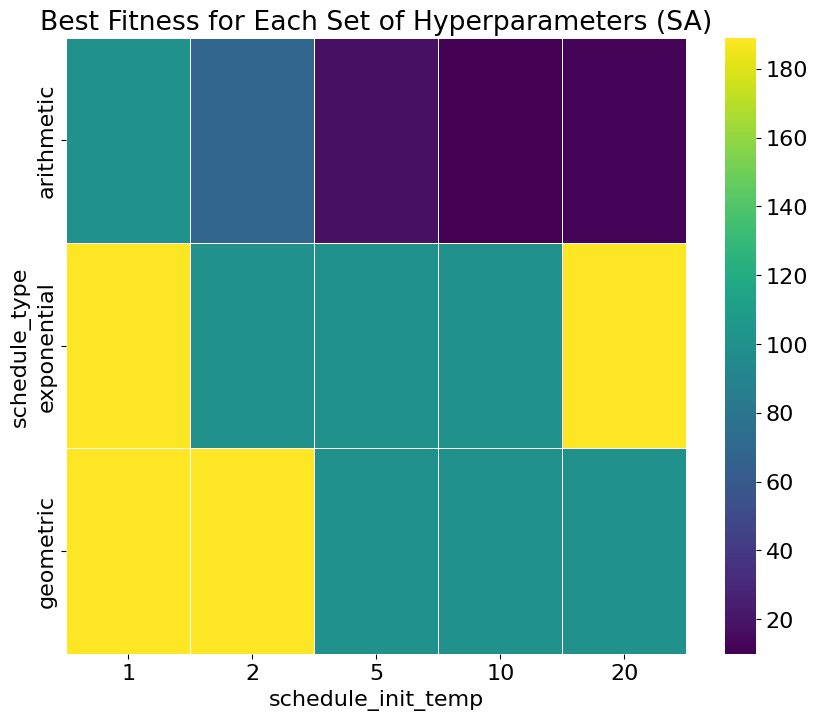

In [24]:
plot_HP_heatmap(sa_hp_max, "schedule_init_temp", "schedule_type", "SA", "4PMAX")

In [15]:
best_run = sa_hp_mean[(sa_hp_mean['schedule_init_temp'] == sa_optimal_HP['schedule_init_temp']) & (sa_hp_mean['schedule_type'] == sa_optimal_HP['schedule_type'])]
best_max = sa_hp_max[(sa_hp_mean['schedule_init_temp'] == sa_optimal_HP['schedule_init_temp']) & (sa_hp_mean['schedule_type'] == sa_optimal_HP['schedule_type'])]
best_std = sa_hp_std[(sa_hp_mean['schedule_init_temp'] == sa_optimal_HP['schedule_init_temp']) & (sa_hp_mean['schedule_type'] == sa_optimal_HP['schedule_type'])]
print(f'Best Fitness Avg: {best_run["Fitness"].max()}')
print(f'Best Fitness MAX: {best_max["Fitness"].max()}')
print(f'Best Iteration: {best_run["FEvals"].max()}')
print(f'Best Time: {best_run["Time"].max()}')
print(f'Best STD: {best_std["Fitness"].max()}')

Best Fitness Avg: 117.8
Best Fitness MAX: 189.0
Best Iteration: 7045.0
Best Time: 4.276353445799032
Best STD: 40.350464681339176


### 3.3.2 SA Iteration impact on mean and max fitness

In [50]:
sa = SARunner(problem=problem_hard,
              experiment_name='sa',
              output_directory=None, # note: specify an output directory to have results saved to disk "experiments/TSP_SA_HP"
              seed=FIXED_SEED,
              iteration_list=np.arange(0, 20000, 100),
              max_attempts=2000,
              temperature_list=[10],
              decay_list=[mlrose_hiive.GeomDecay])

sa_results = run_experiment_multi_seed(sa, [1,2,3,4,5,6,7,8,9,10])

import pickle
with open('experiments/4PEAKS_SA_HP_hard.pkl', 'wb') as f:
    pickle.dump(sa_results, f)

sa_hp_mean, sa_hp_std, sa_hp_min, sa_hp_max = runner_results_to_stats(sa_results)

Runner 0 seed: 1
Runner 1 seed: 2
Runner 2 seed: 3
Runner 3 seed: 4
Runner 4 seed: 5
Runner 5 seed: 6
Runner 6 seed: 7
Runner 7 seed: 8
Runner 8 seed: 9
Runner 9 seed: 10


In [52]:
best_run = sa_hp_mean[(sa_hp_mean['schedule_init_temp'] == sa_optimal_HP['schedule_init_temp']) & (sa_hp_mean['schedule_type'] == sa_optimal_HP['schedule_type'])]
best_max = sa_hp_max[(sa_hp_mean['schedule_init_temp'] == sa_optimal_HP['schedule_init_temp']) & (sa_hp_mean['schedule_type'] == sa_optimal_HP['schedule_type'])]
best_std = sa_hp_std[(sa_hp_mean['schedule_init_temp'] == sa_optimal_HP['schedule_init_temp']) & (sa_hp_mean['schedule_type'] == sa_optimal_HP['schedule_type'])]
print(f'Best Fitness Avg: {best_run["Fitness"].max()}')
print(f'Best Fitness MAX: {best_max["Fitness"].max()}')
print(f'Best STD: {best_std["Fitness"].max()}')
print(f'Best Iteration: {best_run["FEvals"].max()}')
print(f'Best Time: {best_run["Time"].max()}')

Best Fitness Avg: 117.8
Best Fitness MAX: 189.0
Best STD: 49.84816947491653
Best Iteration: 9415.2
Best Time: 17.460322793800877


### 3.3.3 SA Medium

In [10]:
sa = SARunner(problem=problem_medium,
              experiment_name='sa',
              output_directory=None, # note: specify an output directory to have results saved to disk "experiments/TSP_SA_HP"
              seed=FIXED_SEED,
              iteration_list=np.arange(0, 5000, 100),
              max_attempts=300,
              temperature_list=[1,2,5,10,20],
              decay_list=[mlrose_hiive.GeomDecay, mlrose_hiive.ExpDecay, mlrose_hiive.ArithDecay])

sa_results = run_experiment_multi_seed(sa, RANDOM_SEEDS)

import pickle
with open('experiments/4PEAKS_SA_HP_medium.pkl', 'wb') as f:
    pickle.dump(sa_results, f)


Runner 0 seed: 1
Runner 1 seed: 2
Runner 2 seed: 3
Runner 3 seed: 4
Runner 4 seed: 5


{'schedule_init_temp': 2, 'schedule_type': 'exponential'}
Best Fitness Avg: 94.0
Best Fitness MAX: 94.0
Best Iteration: 2298.6
Best Time: 0.638775655599602
Best STD: 29.411562352245078
Best Fitness Iteration: 1000
Best Fitness Iteration: 1700


<Figure size 640x480 with 0 Axes>

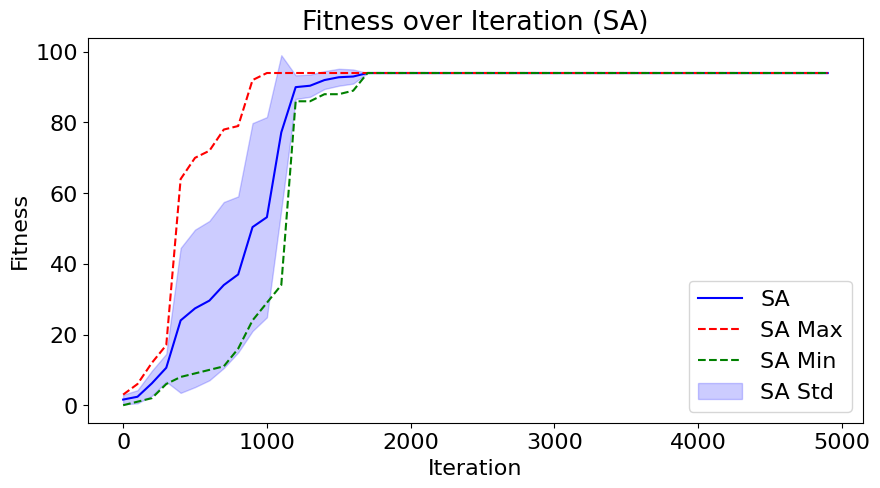

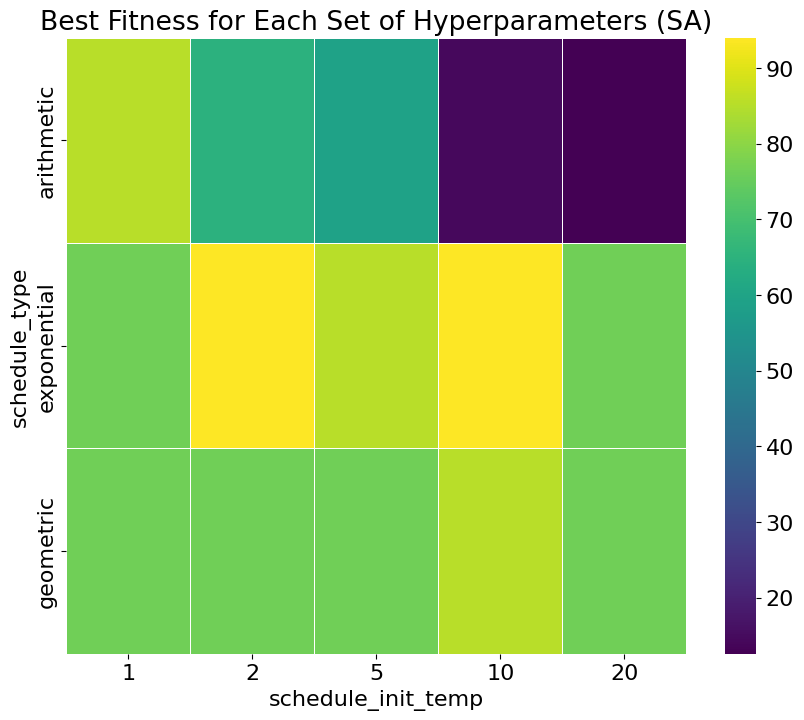

In [11]:
sa_hp_mean, sa_hp_std, sa_hp_min, sa_hp_max = runner_results_to_stats(sa_results)
sa_optimal_HP = get_optimal_hyperparameters(sa_hp_mean, ['schedule_init_temp', 'schedule_type'])
best_run = sa_hp_mean[(sa_hp_mean['schedule_init_temp'] == sa_optimal_HP['schedule_init_temp']) & (sa_hp_mean['schedule_type'] == sa_optimal_HP['schedule_type'])]
best_max = sa_hp_max[(sa_hp_mean['schedule_init_temp'] == sa_optimal_HP['schedule_init_temp']) & (sa_hp_mean['schedule_type'] == sa_optimal_HP['schedule_type'])]
best_std = sa_hp_std[(sa_hp_mean['schedule_init_temp'] == sa_optimal_HP['schedule_init_temp']) & (sa_hp_mean['schedule_type'] == sa_optimal_HP['schedule_type'])]
best_run_min = sa_hp_min[(sa_hp_mean['schedule_init_temp'] == sa_optimal_HP['schedule_init_temp']) & (sa_hp_mean['schedule_type'] == sa_optimal_HP['schedule_type'])]
print(sa_optimal_HP)
print(f'Best Fitness Avg: {best_run["Fitness"].max()}')
print(f'Best Fitness MAX: {best_max["Fitness"].max()}')
print(f'Best Iteration: {best_run["FEvals"].max()}')
print(f'Best Time: {best_run["Time"].max()}')
print(f'Best STD: {best_std["Fitness"].max()}')
# find the earlieest iteration where the fitness is the best and print it
print(f'Best Fitness Iteration: {best_max[best_max["Fitness"] == 94.0]["Iteration"].min()}')
# same but with the mean
print(f'Best Fitness Iteration: {best_run[best_run["Fitness"] == best_run["Fitness"].max()]["Iteration"].min()}')
plot_fitness_iteration(best_run, best_std, best_run_min, best_max, "SA", "TSP")
plot_HP_heatmap(sa_hp_mean, "schedule_init_temp", "schedule_type", "SA", "4PMedium")

### 3.3.3 SA Easy

In [9]:
sa = SARunner(problem=problem_easy,
              experiment_name='sa',
              output_directory=None, # note: specify an output directory to have results saved to disk "experiments/TSP_SA_HP"
              seed=FIXED_SEED,
              iteration_list=np.arange(0, 5000, 100),
              max_attempts=300,
              temperature_list=[1,2,5,10,20],
              decay_list=[mlrose_hiive.GeomDecay, mlrose_hiive.ExpDecay, mlrose_hiive.ArithDecay])

sa_results = run_experiment_multi_seed(sa, RANDOM_SEEDS)

import pickle
with open('experiments/4PEAKS_SA_HP_easy.pkl', 'wb') as f:
    pickle.dump(sa_results, f)


Runner 0 seed: 1
Runner 1 seed: 2
Runner 2 seed: 3
Runner 3 seed: 4
Runner 4 seed: 5


{'schedule_init_temp': 1, 'schedule_type': 'arithmetic'}
Best Fitness Avg: 56.0
Best Fitness MAX: 56.0
Best Iteration: 4385.1
Best Time: 4.723133142001461
Best STD: 15.829087149927505
Best Fitness Iteration: 400
Best Fitness Iteration: 4200


<Figure size 640x480 with 0 Axes>

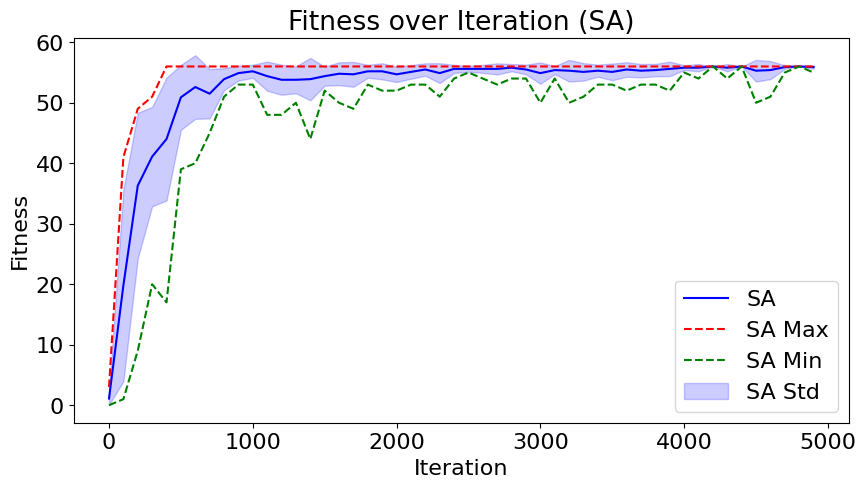

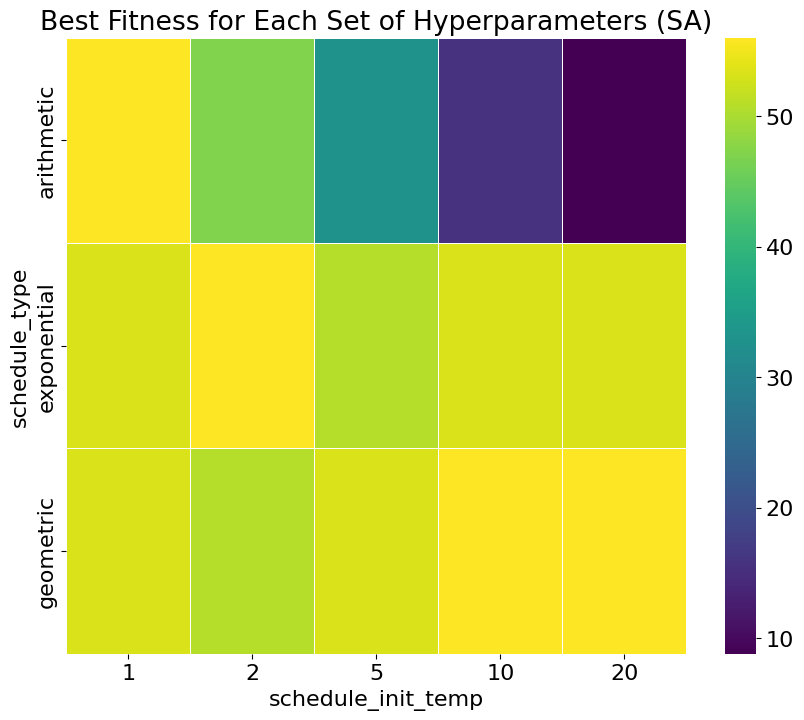

In [8]:
sa_hp_mean, sa_hp_std, sa_hp_min, sa_hp_max = runner_results_to_stats(sa_results)
sa_optimal_HP = get_optimal_hyperparameters(sa_hp_mean, ['schedule_init_temp', 'schedule_type'])
best_run = sa_hp_mean[(sa_hp_mean['schedule_init_temp'] == sa_optimal_HP['schedule_init_temp']) & (sa_hp_mean['schedule_type'] == sa_optimal_HP['schedule_type'])]
best_max = sa_hp_max[(sa_hp_mean['schedule_init_temp'] == sa_optimal_HP['schedule_init_temp']) & (sa_hp_mean['schedule_type'] == sa_optimal_HP['schedule_type'])]
best_std = sa_hp_std[(sa_hp_mean['schedule_init_temp'] == sa_optimal_HP['schedule_init_temp']) & (sa_hp_mean['schedule_type'] == sa_optimal_HP['schedule_type'])]
best_run_min = sa_hp_min[(sa_hp_mean['schedule_init_temp'] == sa_optimal_HP['schedule_init_temp']) & (sa_hp_mean['schedule_type'] == sa_optimal_HP['schedule_type'])]
print(sa_optimal_HP)
print(f'Best Fitness Avg: {best_run["Fitness"].max()}')
print(f'Best Fitness MAX: {best_max["Fitness"].max()}')
print(f'Best Iteration: {best_run["FEvals"].max()}')
print(f'Best Time: {best_run["Time"].max()}')
print(f'Best STD: {best_std["Fitness"].max()}')
# find the earlieest iteration where the fitness is the best and print it
print(f'Best Fitness Iteration: {best_max[best_max["Fitness"] == 56.0]["Iteration"].min()}')
# same but with the mean
print(f'Best Fitness Iteration: {best_run[best_run["Fitness"] == best_run["Fitness"].max()]["Iteration"].min()}')
plot_fitness_iteration(best_run, best_std, best_run_min, best_max, "SA", "TSP")
plot_HP_heatmap(sa_hp_mean, "schedule_init_temp", "schedule_type", "SA", "4PMedium")

# 4. Visualization for Report

In [48]:
import pickle

with open('experiments/4PEAKS_SA_HP_hard.pkl', 'rb') as f:
    sa_results = pickle.load(f)

with open('experiments/4K_GA_HP_hard.pkl', 'rb') as f:
    ga_results = pickle.load(f)

with open('experiments/4K_MMC_HP_hard.pkl', 'rb') as f:
    mmc_results = pickle.load(f)


sa_hp_mean, sa_hp_std, sa_hp_min, sa_hp_max = runner_results_to_stats(sa_results)
sa_optimal_HP = get_optimal_hyperparameters(sa_hp_mean, ['schedule_init_temp', 'schedule_type'])

ga_hp_mean, ga_hp_std, ga_hp_min, ga_hp_max = runner_results_to_stats(ga_results)
ga_optimal_HP = get_optimal_hyperparameters(ga_hp_mean, ['Population Size', 'Mutation Rate'])

mmc_hp_mean, mmc_hp_std, mmc_hp_min, mmc_hp_max = runner_results_to_stats(mmc_results)
mmc_optimal_HP = get_optimal_hyperparameters(mmc_hp_mean, ['Population Size', 'Keep Percent'])


best_sa_run = sa_hp_mean[(sa_hp_mean['schedule_init_temp'] == sa_optimal_HP['schedule_init_temp']) & (sa_hp_mean['schedule_type'] == sa_optimal_HP['schedule_type'])]
best_sa_max = sa_hp_max[(sa_hp_mean['schedule_init_temp'] == sa_optimal_HP['schedule_init_temp']) & (sa_hp_mean['schedule_type'] == sa_optimal_HP['schedule_type'])]
best_sa_std = sa_hp_std[(sa_hp_mean['schedule_init_temp'] == sa_optimal_HP['schedule_init_temp']) & (sa_hp_mean['schedule_type'] == sa_optimal_HP['schedule_type'])]

best_ga_run = ga_hp_mean[(ga_hp_mean['Population Size'] == ga_optimal_HP['Population Size']) & (ga_hp_mean['Mutation Rate'] == ga_optimal_HP['Mutation Rate'])]
best_ga_max = ga_hp_max[(ga_hp_mean['Population Size'] == ga_optimal_HP['Population Size']) & (ga_hp_mean['Mutation Rate'] == ga_optimal_HP['Mutation Rate'])]
best_ga_std = ga_hp_std[(ga_hp_mean['Population Size'] == ga_optimal_HP['Population Size']) & (ga_hp_mean['Mutation Rate'] == ga_optimal_HP['Mutation Rate'])]

best_mmc_run = mmc_hp_mean[(mmc_hp_mean['Population Size'] == mmc_optimal_HP['Population Size']) & (mmc_hp_mean['Keep Percent'] == mmc_optimal_HP['Keep Percent'])]
best_mmc_max = mmc_hp_max[(mmc_hp_mean['Population Size'] == mmc_optimal_HP['Population Size']) & (mmc_hp_mean['Keep Percent'] == mmc_optimal_HP['Keep Percent'])]
best_mmc_std = mmc_hp_std[(mmc_hp_mean['Population Size'] == mmc_optimal_HP['Population Size']) & (mmc_hp_mean['Keep Percent'] == mmc_optimal_HP['Keep Percent'])]

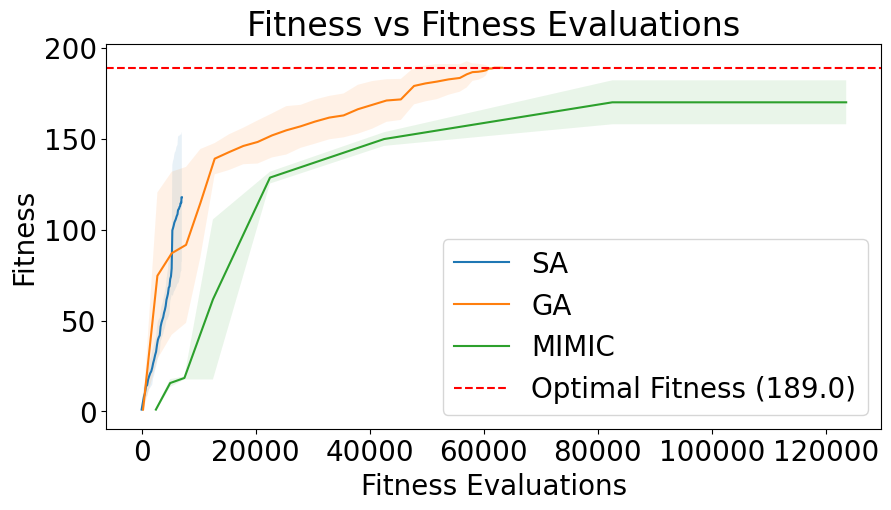

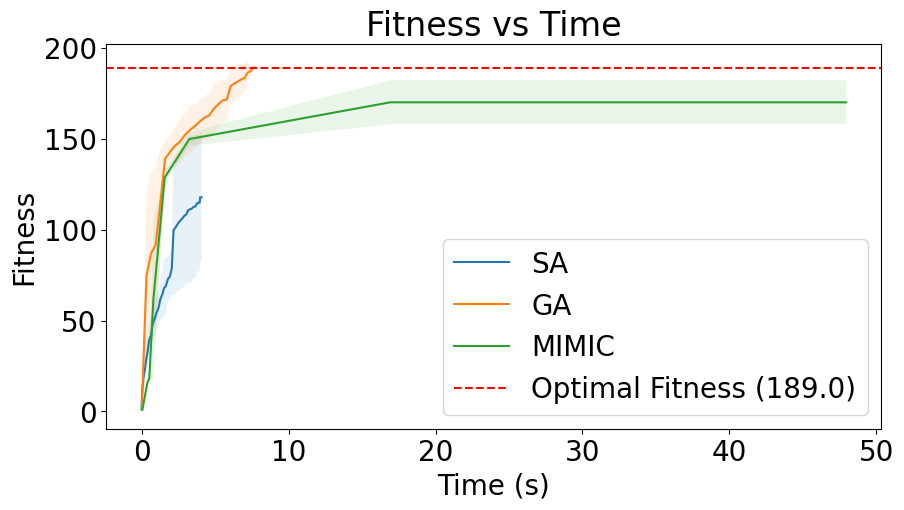

In [67]:
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))


plt.figure(figsize=(10, 5))
plt.plot(best_sa_run['FEvals'], best_sa_run['Fitness'], label='SA')
plt.plot(best_ga_run['FEvals'], best_ga_run['Fitness'], label='GA')
plt.plot(best_mmc_run['FEvals'], best_mmc_run['Fitness'], label='MIMIC')
# add std
plt.fill_between(best_sa_run['FEvals'], best_sa_run['Fitness'] - best_sa_std['Fitness'], best_sa_run['Fitness'] + best_sa_std['Fitness'], alpha=0.1)
plt.fill_between(best_ga_run['FEvals'], best_ga_run['Fitness'] - best_ga_std['Fitness'], best_ga_run['Fitness'] + best_ga_std['Fitness'], alpha=0.1)
plt.fill_between(best_mmc_run['FEvals'], best_mmc_run['Fitness'] - best_mmc_std['Fitness'], best_mmc_run['Fitness'] + best_mmc_std['Fitness'], alpha=0.1)

# add h line for optimal fitness 189
plt.axhline(189, color='r', linestyle='--', label='Optimal Fitness (189.0)')

plt.xlabel('Fitness Evaluations')
plt.ylabel('Fitness')
plt.title('Fitness vs Fitness Evaluations')
# set_ylim(-2500, -1100)
plt.legend()
plt.savefig("figures/4P_Fitness_vs_FEvals.pdf", dpi=300, bbox_inches="tight")
plt.show()


# Same with time
plt.figure(figsize=(10, 5))
plt.plot(best_sa_run['Time'], best_sa_run['Fitness'], label='SA')
plt.plot(best_ga_run['Time'], best_ga_run['Fitness'], label='GA')
plt.plot(best_mmc_run['Time'], best_mmc_run['Fitness'], label='MIMIC')
# add std
plt.fill_between(best_sa_run['Time'], best_sa_run['Fitness'] - best_sa_std['Fitness'], best_sa_run['Fitness'] + best_sa_std['Fitness'], alpha=0.1)
plt.fill_between(best_ga_run['Time'], best_ga_run['Fitness'] - best_ga_std['Fitness'], best_ga_run['Fitness'] + best_ga_std['Fitness'], alpha=0.1)
plt.fill_between(best_mmc_run['Time'], best_mmc_run['Fitness'] - best_mmc_std['Fitness'], best_mmc_run['Fitness'] + best_mmc_std['Fitness'], alpha=0.1)

# add h line for optimal fitness 189
plt.axhline(189, color='r', linestyle='--', label='Optimal Fitness (189.0)')
plt.xlabel('Time (s)')
plt.ylabel('Fitness')
plt.title('Fitness vs Time')
# set_ylim(-2500, -1100)
plt.legend()
plt.savefig("figures/4P_Fitness_vs_Time.pdf", dpi=300, bbox_inches="tight")
plt.show()
